In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random

from sklearn import linear_model, metrics

Итоговая работа должна отвечать следующим требованиям:

	Программа реализована на языке программирования Python.
	Выполнена загрузка и чтение данных из файлов.
	Выполнена предварительная обработка данных (очистка и форматирование данных).
	Выполнен разведочный анализ данных EDA.
	Определены важные признаки. Выполнен поиск взаимосвязей между признаками.
	Выполнено уменьшение размерности массива данных.
	Составлена гипотеза о данных и выполнена проверка соответствующей гипотезы.

Аналитическая задача: построить модель для прогнозирования стоимости квартиры.

Исходные данные: имеется выборка данных о продаже квартир.


airports_nearest		расстояние до ближайшего аэропорта в метрах (м)
balcony				число балконов
ceiling_height			высота потолков (м)
cityCenters_nearest		расстояние до центра города (м)
floor				этаж
floors_total			всего этажей в доме
is_apartment			апартаменты (булев тип)
kitchen_area			площадь кухни в квадратных метрах (м²)
last_price			цена на момент снятия с публикации
living_area			жилая площадь в квадратных метрах(м²)
open_plan			свободная планировка (булев тип)
parks_around3000		число парков в радиусе 3 км
parks_nearest			расстояние до ближайшего парка (м)
ponds_around3000		число водоёмов в радиусе 3 км
ponds_nearest			расстояние до ближайшего водоёма (м)
rooms				число комнат
studio				квартира-студия (булев тип)
total_area			площадь квартиры в квадратных метрах (м²)


Выполним загрузку и чтение данных из файлов.

In [ ]:
# откроем файл
df  = pd.read_csv('/content/drive/MyDrive/Data/home_price.csv')

In [ ]:
# выведем df
df # все столбцы df числовые или булевые, что несколько облегчает нам задачу для создания модели - не надо исследовать категориальные признаки

last_price  total_area  rooms  ceiling_height  floors_total  \
0      13000000.0      108.00      3            2.70          16.0   
1       3350000.0       40.40      1             NaN          11.0   
2       5196000.0       56.00      2             NaN           5.0   
3      64900000.0      159.00      3             NaN          14.0   
4      10000000.0      100.00      2            3.03          14.0   
...           ...         ...    ...             ...           ...   
23694   9700000.0      133.81      3            3.70           5.0   
23695   3100000.0       59.00      3             NaN           5.0   
23696   2500000.0       56.70      2             NaN           3.0   
23697  11475000.0       76.75      2            3.00          17.0   
23698   1350000.0       32.30      1            2.50           5.0   

       living_area  floor is_apartment  studio  open_plan  kitchen_area  \
0             51.0      8          NaN   False      False         25.00   
1             18.6      1          NaN   False      False         11.00   
2             34.3      4          NaN   False      False          8.30   
3              NaN      9          NaN   False      False           NaN   
4             32.0     13          NaN   False      False         41.00   
...            ...    ...          ...     ...        ...           ...   
23694         73.3      3          NaN   False      False         13.83   
23695         38.0      4          NaN   False      False          8.50   
23696         29.7      1          NaN   False      False           NaN   
23697          NaN     12          NaN   False      False         23.30   
23698         12.3      1          NaN   False      False          9.00   

       balcony  airports_nearest  cityCenters_nearest  parks_around3000  \
0          NaN           18863.0              16028.0               1.0   
1          2.0           12817.0              18603.0               0.0   
2          0.0           21741.0              13933.0               1.0   
3          0.0           28098.0               6800.0               2.0   
4          NaN           31856.0               8098.0               2.0   
...        ...               ...                  ...               ...   
23694      NaN           24665.0               4232.0               1.0   
23695      NaN               NaN                  NaN               NaN   
23696      NaN               NaN                  NaN               NaN   
23697      2.0           39140.0              10364.0               2.0   
23698      NaN               NaN                  NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  
0              482.0               2.0          755.0  
1                NaN               0.0            NaN  
2               90.0               2.0          574.0  
3               84.0               3.0          234.0  
4              112.0               1.0           48.0  
...              ...               ...            ...  
23694          796.0               3.0          381.0  
23695            NaN               NaN            NaN  
23696            NaN               NaN            NaN  
23697          173.0               3.0          196.0  
23698            NaN               NaN            NaN  

[23699 rows x 18 columns]

In [ ]:
# переведем булевые столбцы в числовые
df['studio'] = df['studio'].astype('int64')
df['studio'].value_counts(normalize = True)
# и мы видим, что студий всего 149 шт. это меньше одного процента от Df. Очевидно, что влияние признака на цену будет мкроскопическое

studio
0    0.993713
1    0.006287
Name: proportion, dtype: float64

In [ ]:

df['open_plan'] = df['open_plan'].astype('int64')
df['open_plan'].value_counts(normalize = True) # open plan  - еще меньшее - 64 шттуки.
# тоже очевидно что незначительность количества не позволяет выбирать этот признак как значимый для предсказания цены

open_plan
0    0.997173
1    0.002827
Name: proportion, dtype: float64

In [ ]:
df['open_plan'].value_counts()

open_plan
0    23632
1       67
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           23699 non-null  float64
 1   total_area           23699 non-null  float64
 2   rooms                23699 non-null  int64  
 3   ceiling_height       14504 non-null  float64
 4   floors_total         23613 non-null  float64
 5   living_area          21796 non-null  float64
 6   floor                23699 non-null  int64  
 7   is_apartment         2775 non-null   object 
 8   studio               23699 non-null  int64  
 9   open_plan            23699 non-null  int64  
 10  kitchen_area         21421 non-null  float64
 11  balcony              12180 non-null  float64
 12  airports_nearest     18157 non-null  float64
 13  cityCenters_nearest  18180 non-null  float64
 14  parks_around3000     18181 non-null  float64
 15  parks_nearest        8079 non-null  

In [ ]:
df.isnull().sum() # посчитаем количество пропущенных значений

last_price                 0
total_area                 0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment           20924
studio                     0
open_plan                  0
kitchen_area            2278
balcony                11519
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
dtype: int64

Сразу можно сказать, чтоиз-за огромного количества пропущенных значений (а также поскольку нам не у кого выяснить, м.б.эти значения просто нулевые) - столбцы is_apartment, balcony, parks_nearest и ponds_nearest - их мы точно не сможем использовать в качестве признаков, влияющих на цену квартиры. Больше половины значений в них заполнено пропусками. Также сразу уберем studio и open plan

С осторожностью нужно также относиться к признакам ceiling_height, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 - там не такое грандиозное, но большое количество пропусков.

В случае же с kitchen_area, living_area и floors_total, если выявится высокая корреляция с ценой в ходе анализа, предполагаю, что эти признаки можно будет заполнить средним значением

Сразу и перезапишем df, уменьшив количество столбцов, т.е. начнем очищать данные


In [ ]:
df = df[['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000']]

In [ ]:
# поскольку мы будем строить модель, удалим строки с пропущенными значениями, попробуем начать с  cityCenters_nearest.
df = df.dropna(subset=['cityCenters_nearest'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 23697
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           18180 non-null  float64
 1   total_area           18180 non-null  float64
 2   rooms                18180 non-null  int64  
 3   ceiling_height       11560 non-null  float64
 4   floors_total         18104 non-null  float64
 5   living_area          16900 non-null  float64
 6   floor                18180 non-null  int64  
 7   kitchen_area         16617 non-null  float64
 8   airports_nearest     18156 non-null  float64
 9   cityCenters_nearest  18180 non-null  float64
 10  parks_around3000     18180 non-null  float64
 11  ponds_around3000     18180 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.8 MB


In [ ]:
df.isnull().sum() # посчитаем теперь снова количество пропущенных значений
#  и видим, что нулевые значения по cityCenters_nearest были таже и в признаках parks_around3000, ponds_around3000

last_price                0
total_area                0
rooms                     0
ceiling_height         6620
floors_total             76
living_area            1280
floor                     0
kitchen_area           1563
airports_nearest         24
cityCenters_nearest       0
parks_around3000          0
ponds_around3000          0
dtype: int64

In [ ]:
# также на всякий случай проверим на дубликаты
duplicate_rows = df[df.duplicated()]
duplicate_rows
# Дубликат всего 1. Т..е он не сыграет значения. МОгут ли это быть 2 одинаковые по характеристикам квартиры в одном или соседнем типовых домах? Да, могут.
# ПОскольку нам не у кого узнать подробности, то особой целесообразности удалять эти данные я не вижу.

last_price  total_area  rooms  ceiling_height  floors_total  \
22709  59000000.0       127.5      4             3.0          12.0   

       living_area  floor  kitchen_area  airports_nearest  \
22709         85.0      8          13.0           28098.0   

       cityCenters_nearest  parks_around3000  ponds_around3000  
22709               6800.0               2.0               3.0

In [ ]:
df.describe() # выведем описательные статистики для оставшихся столбцов

last_price    total_area         rooms  ceiling_height  floors_total  \
count  1.818000e+04  18180.000000  18180.000000    11560.000000  18104.000000   
mean   7.572985e+06     63.362413      2.139439        2.786612     11.172338   
std    1.214007e+07     38.773790      1.122938        1.234174      6.543302   
min    1.219000e+04     12.000000      0.000000        1.000000      1.000000   
25%    4.000000e+06     41.200000      1.000000        2.550000      5.000000   
50%    5.250000e+06     54.000000      2.000000        2.680000      9.000000   
75%    7.690000e+06     73.000000      3.000000        2.800000     16.000000   
max    7.630000e+08    900.000000     19.000000      100.000000     60.000000   

        living_area         floor  kitchen_area  airports_nearest  \
count  16900.000000  18180.000000  16617.000000      18156.000000   
mean      36.111246      6.135424     10.950399      28794.402897   
std       23.788300      4.947942      6.344560      12630.844700   
min        2.000000      1.000000      1.300000          0.000000   
25%       19.100000      3.000000      7.100000      18585.000000   
50%       31.000000      5.000000      9.700000      26726.000000   
75%       43.500000      8.000000     12.200000      37273.500000   
max      409.700000     33.000000    112.000000      84869.000000   

       cityCenters_nearest  parks_around3000  ponds_around3000  
count         18180.000000      18180.000000      18180.000000  
mean          14191.277833          0.611386          0.770297  
std            8608.386210          0.802090          0.938354  
min             181.000000          0.000000          0.000000  
25%            9238.000000          0.000000          0.000000  
50%           13098.500000          0.000000          1.000000  
75%           16293.000000          1.000000          1.000000  
max           65968.000000          3.000000          3.000000

Сразу видим, что в ceiling_height явно есть как минимум одна ошибка. Высота потолка в 100 по сравнению со среднестатистической высотой потолка 1,26, медианой в 2,65 - что-то неадекватное. Как и высота потолка 1.

Странными цифрами навскидку выглядят также максимальная living_area в 409.70 при медиане в 30 и среднем в 34,4 и kitchen_area 112 при среднем 10,5 и медиане 9,1. Если только какая-то вилла.

Странным или странными являются значения 0 в столбце airports_nearest - ни разу не видела жилплощади прямо в аэропорту

Странными являютя количество комнат, равное 0 ( минимум) и клоичество комнат, равное 19  - явно с этими показателями будет понемногу квартирю
Выбиваются также 60-тоэтажный дом, 33 .
Есть явные экстремумы ( по сравнению с медианой) по столбцами airports_nearest и	cityCenters_nearest

<Axes: >

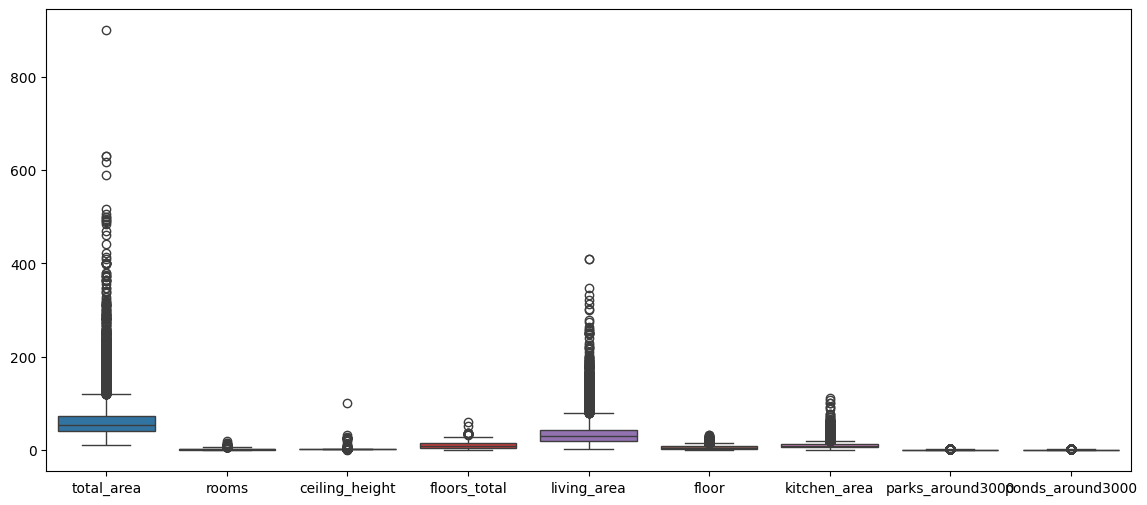

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df[['total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'kitchen_area', 'parks_around3000', 'ponds_around3000']]) # не самое лучшее представление из-за разницы единиц измерения

In [ ]:
# пока уберем по явному выбпрсу из last_price,'ceiling_height', 'living_area'
df = df[df['last_price'] < 763000000]
df = df[df['ceiling_height'] != 100]
df = df[df['living_area'] != 409.7]
df = df[df['living_area'] != 409]

In [ ]:
df.describe()

last_price    total_area         rooms  ceiling_height  floors_total  \
count  1.817600e+04  18176.000000  18176.000000    11557.000000  18100.000000   
mean   7.505164e+06     63.270999      2.137984        2.778137     11.172265   
std    1.031830e+07     37.995275      1.115994        0.840041      6.542938   
min    1.219000e+04     12.000000      0.000000        1.000000      1.000000   
25%    4.000000e+06     41.200000      1.000000        2.550000      5.000000   
50%    5.250000e+06     54.000000      2.000000        2.680000      9.000000   
75%    7.690000e+06     73.000000      3.000000        2.800000     16.000000   
max    4.013000e+08    631.200000     19.000000       32.000000     60.000000   

        living_area         floor  kitchen_area  airports_nearest  \
count  16896.000000  18176.000000  16614.000000      18152.000000   
mean      36.055714      6.134408     10.938954      28794.400342   
std       23.383464      4.946362      6.258483      12632.074579   
min        2.000000      1.000000      1.300000          0.000000   
25%       19.100000      3.000000      7.100000      18584.250000   
50%       31.000000      5.000000      9.700000      26726.000000   
75%       43.500000      8.000000     12.200000      37275.500000   
max      347.500000     33.000000    107.000000      84869.000000   

       cityCenters_nearest  parks_around3000  ponds_around3000  
count         18176.000000      18176.000000      18176.000000  
mean          14193.037467          0.611356          0.770026  
std            8608.469591          0.802150          0.938104  
min             181.000000          0.000000          0.000000  
25%            9238.000000          0.000000          0.000000  
50%           13101.000000          0.000000          1.000000  
75%           16293.000000          1.000000          1.000000  
max           65968.000000          3.000000          3.000000

<Axes: >

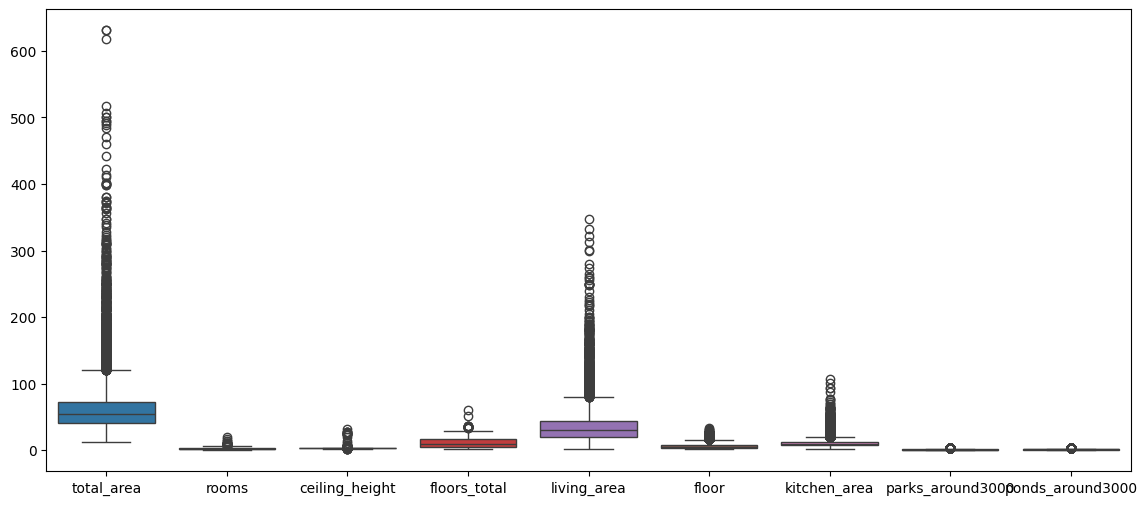

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df[['total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'kitchen_area', 'parks_around3000', 'ponds_around3000']]) # чуть, лучше, но все равно c ценой неудачно. ПОпробуем по другим категориям, без цены
       # также большие числовые значения в 'airports_nearest', 'cityCenters_nearest'. Уберем и их

In [ ]:
df.describe()

last_price    total_area         rooms  ceiling_height  floors_total  \
count  1.817600e+04  18176.000000  18176.000000    11557.000000  18100.000000   
mean   7.505164e+06     63.270999      2.137984        2.778137     11.172265   
std    1.031830e+07     37.995275      1.115994        0.840041      6.542938   
min    1.219000e+04     12.000000      0.000000        1.000000      1.000000   
25%    4.000000e+06     41.200000      1.000000        2.550000      5.000000   
50%    5.250000e+06     54.000000      2.000000        2.680000      9.000000   
75%    7.690000e+06     73.000000      3.000000        2.800000     16.000000   
max    4.013000e+08    631.200000     19.000000       32.000000     60.000000   

        living_area         floor  kitchen_area  airports_nearest  \
count  16896.000000  18176.000000  16614.000000      18152.000000   
mean      36.055714      6.134408     10.938954      28794.400342   
std       23.383464      4.946362      6.258483      12632.074579   
min        2.000000      1.000000      1.300000          0.000000   
25%       19.100000      3.000000      7.100000      18584.250000   
50%       31.000000      5.000000      9.700000      26726.000000   
75%       43.500000      8.000000     12.200000      37275.500000   
max      347.500000     33.000000    107.000000      84869.000000   

       cityCenters_nearest  parks_around3000  ponds_around3000  
count         18176.000000      18176.000000      18176.000000  
mean          14193.037467          0.611356          0.770026  
std            8608.469591          0.802150          0.938104  
min             181.000000          0.000000          0.000000  
25%            9238.000000          0.000000          0.000000  
50%           13101.000000          0.000000          1.000000  
75%           16293.000000          1.000000          1.000000  
max           65968.000000          3.000000          3.000000

<Axes: >

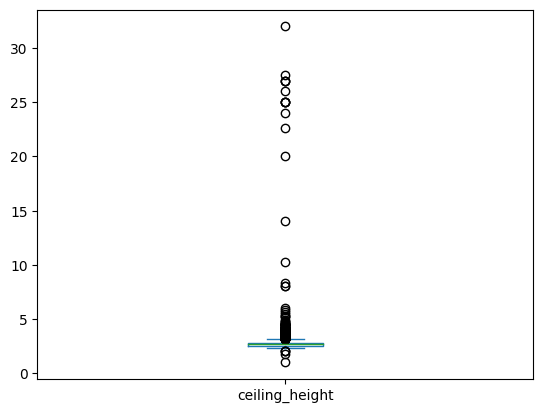

In [ ]:
df['ceiling_height'].plot.box() # # что же все-таки творится с потолками-то. 100 убрали, но Что за потолки больше 10 метров. посмотрим сколько таких значений

In [ ]:
df[df['ceiling_height'] == 1] # квартира с потолком высотой в 1. В остальных данных вроде нет аномаоий

last_price  total_area  rooms  ceiling_height  floors_total  \
22590   6000000.0        55.0      2             1.0          12.0   

       living_area  floor  kitchen_area  airports_nearest  \
22590         32.4      7          10.0           33053.0   

       cityCenters_nearest  parks_around3000  ponds_around3000  
22590              14217.0               2.0               2.0

<Axes: ylabel='Density'>

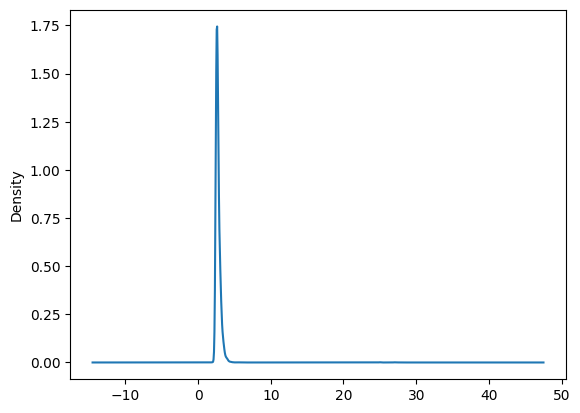

In [ ]:
df['ceiling_height'].plot.density()

In [ ]:
df_anomaly_ceilings = df[(df['ceiling_height'] > 5) | (df['ceiling_height'] <= 2)]
df_averege_ceilings = df[(df['ceiling_height'] <= 5) | (df['ceiling_height'] > 2)]
df_anomaly_ceilings.info() # 30 странных значений, хотя, честного воря, потолок высотой 4-5 м - это тоже довольно странное жилое помещение

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 464 to 22590
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           30 non-null     float64
 1   total_area           30 non-null     float64
 2   rooms                30 non-null     int64  
 3   ceiling_height       30 non-null     float64
 4   floors_total         30 non-null     float64
 5   living_area          28 non-null     float64
 6   floor                30 non-null     int64  
 7   kitchen_area         23 non-null     float64
 8   airports_nearest     30 non-null     float64
 9   cityCenters_nearest  30 non-null     float64
 10  parks_around3000     30 non-null     float64
 11  ponds_around3000     30 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 3.0 KB


<Axes: ylabel='Frequency'>

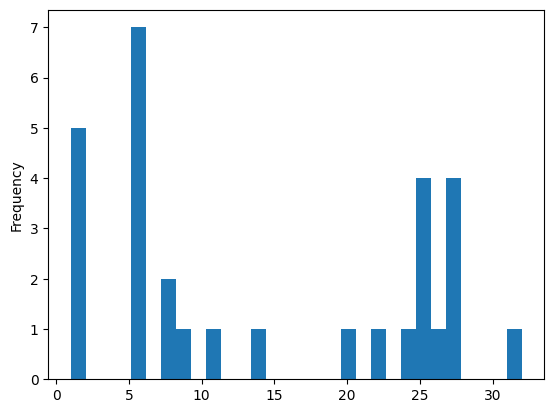

In [ ]:
df_anomaly_ceilings['ceiling_height'].plot.hist(bins = 30)

<Axes: ylabel='Frequency'>

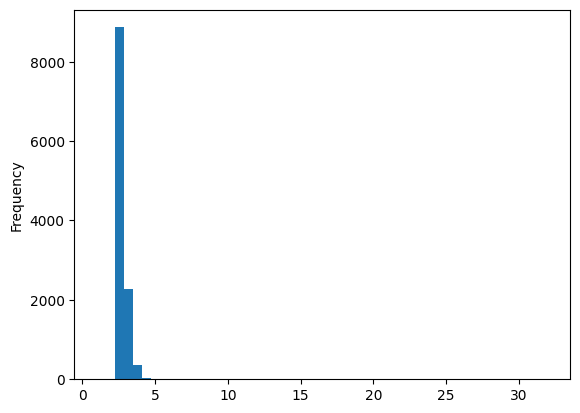

In [ ]:
df_averege_ceilings['ceiling_height'].plot.hist(bins = 50) # НЕравномерно распределено. Основной свал - в самом начале (примерно у отметки 2,5 м, что довольно логично, поскольку это достаточно принятая высота потолка)

<Axes: xlabel='ceiling_height', ylabel='last_price'>

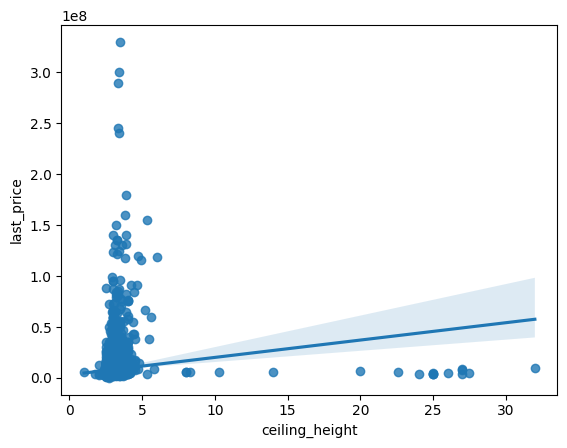

In [ ]:
sns.regplot(df, x = 'ceiling_height', y = 'last_price') # посмотрим, есть ли очевидные корреляции. На всем df  они не слишком заметны

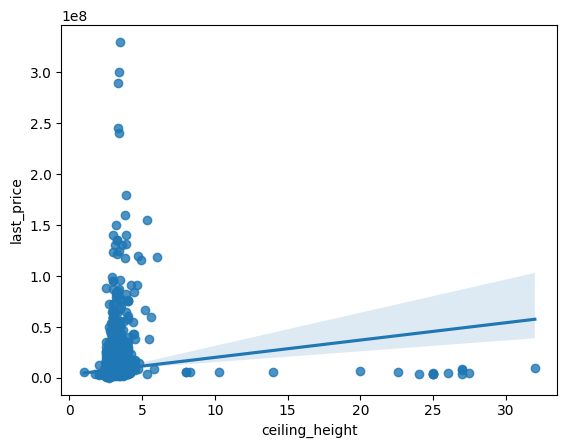

In [ ]:
sns.regplot(df_averege_ceilings, x = 'ceiling_height', y = 'last_price') # на урезанном df немного получше. Но видно, что много выбросов и точки неравномерно распределены вдоль прямой
# учитывая сложности с этим столбцом, непонятки откуда взялись как помещения с высотой потолка 1, 100, так и помещения с высотой потолка 14, 27, 32 (это что за ангары такие...) -
# многие странности наводят на мысль, что в данном столббце есть ошибки. Или разные метрические системы? Ответов нет.
# С учетом изложенного, и, учитывая, что в этом столбце после урезания df все равно осталось 6620 пропущенных значений, считаю,
# что от использования этого столбца в качестве  влияющего на цену признака стоит отказаться.
# скорректируем Df
df = df[['last_price', 'total_area', 'rooms', 'floors_total',
       'living_area', 'floor', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000']]

In [ ]:
# посмотрим living_area с ее аномалиями
df['living_area'].describe()
# от 2 кв. м. жилой до 347. Среднее 37, медиана 31,5

count    16896.000000
mean        36.055714
std         23.383464
min          2.000000
25%         19.100000
50%         31.000000
75%         43.500000
max        347.500000
Name: living_area, dtype: float64

In [ ]:
df['living_area'].isnull().sum() # 1280+16896 = 18176 (в общее количество строк попали)

1280

<Axes: ylabel='Frequency'>

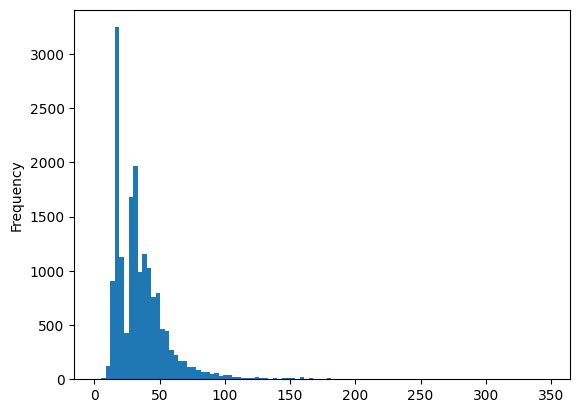

In [ ]:
df['living_area'].plot.hist(bins = 100)

<ipython-input-30-86634310ffa0>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x = 'living_area', hue = 'rooms')


<Axes: xlabel='living_area', ylabel='Density'>

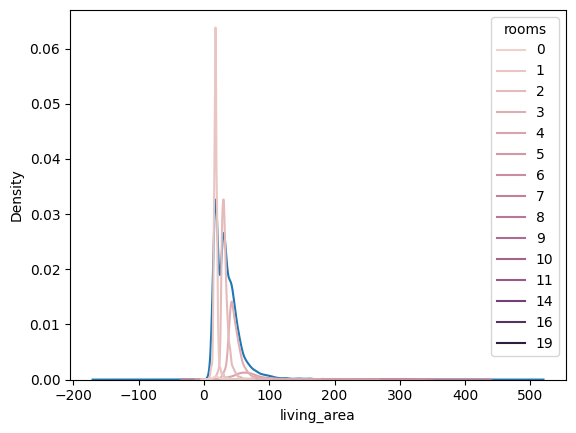

In [ ]:
df['living_area'].plot.density() # пики, вероятно, связаны с количеством комнат - покажем это графически
sns.kdeplot(df, x = 'living_area', hue = 'rooms')

In [ ]:
# df[df['living_area'] == 2] # похоже на ошибку, двухкомнатная квартира с жилой площадью в 2 кв.м при общей в 52 - это странно. Заменим на медианное значение, поскольку остальные данные вроде неплохи

In [ ]:
# образец newDf = newDf.drop(51, axis = 0).reset_index(drop=True)
# df = df.drop(13915, axis = 0).reset_index(drop = True)
#df['living_area'][13915] = 31.5
#df['living_area'][13915]

In [ ]:
df[df['living_area'] < 6] # (взяла 6 кв. м т.к. у нас это минимум жилой площаи на 1 человека) странно выглядятвсе 5 значений.


last_price  total_area  rooms  floors_total  living_area  floor  \
3242    4440000.0        41.0      1          17.0          3.0     17   
13915   6350000.0        52.0      2           6.0          2.0      2   
17582   2680000.0        22.0      0          25.0          5.0      8   
21943   6100000.0        77.6      4           9.0          5.4      1   
23574  64990000.0       139.0      3           8.0          3.0      8   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
3242           11.0           19272.0              13073.0               0.0   
13915           9.0           32453.0               6521.0               0.0   
17582           NaN           22735.0              11618.0               1.0   
21943           9.8           29338.0              11270.0               1.0   
23574          16.0           33255.0               5975.0               1.0   

       ponds_around3000  
3242                0.0  
13915               1.0  
17582               1.0  
21943               0.0  
23574               3.0

удалим нижние выбросы и еще парочку выбивающихся верхних

In [ ]:
df = df[(df['living_area'] != 2) & (df['living_area'] != 3) & (df['living_area'] != 5) & (df['living_area'] != 5.4) & (df['living_area'] != 347.5) & (df['living_area'] != 332)]
df['living_area'].describe()

count    16889.000000
mean        36.029336
std         23.146745
min          6.000000
25%         19.100000
50%         31.000000
75%         43.500000
max        322.300000
Name: living_area, dtype: float64

<Axes: ylabel='living_area'>

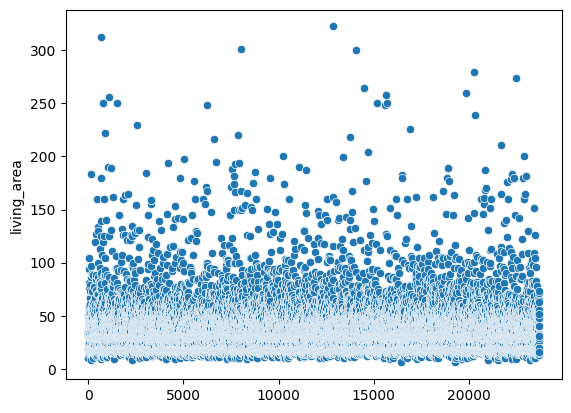

In [ ]:
sns.scatterplot(df['living_area'])

In [ ]:
df['kitchen_area'].describe()

count    16608.000000
mean        10.937318
std          6.257926
min          1.300000
25%          7.100000
50%          9.700000
75%         12.200000
max        107.000000
Name: kitchen_area, dtype: float64

<ipython-input-37-53c05b87a330>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x = 'kitchen_area', hue = 'rooms')


<Axes: xlabel='kitchen_area', ylabel='Density'>

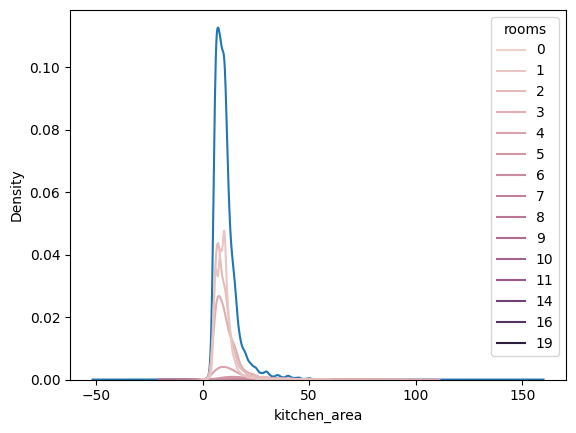

In [ ]:
# последне что явно выбивалось - kitchen_area
df['kitchen_area'].plot.density()
sns.kdeplot(df, x = 'kitchen_area', hue = 'rooms')
# влияние количества комнат на график плотности распредеения площади кухни заметно, хотя и с особенностями (слишком многокомнатные редкие квартиры смазывают картину)

<Axes: ylabel='Frequency'>

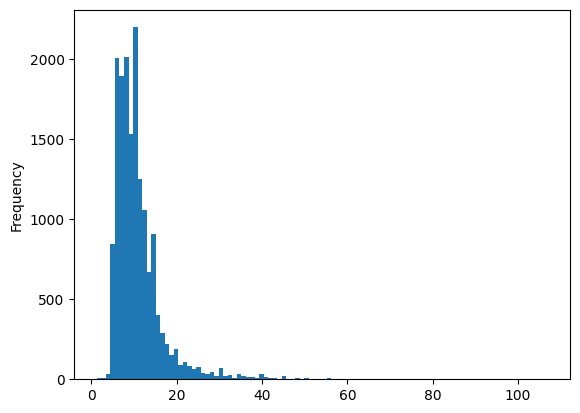

In [ ]:
df['kitchen_area'].plot.hist(bins = 100)

<Axes: >

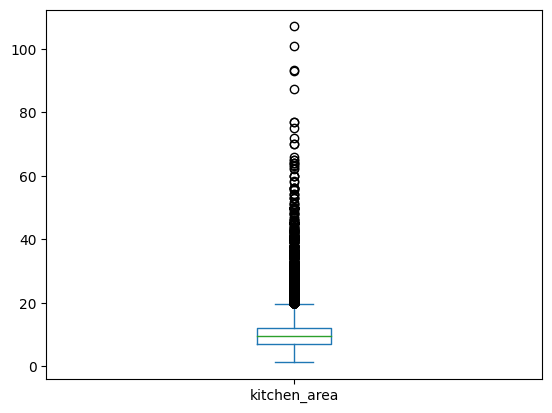

In [ ]:
df['kitchen_area'].plot.box()

In [ ]:
df[df['kitchen_area'] > 80] # в целом хоть эти данные и выбиваются по параметру но они выглядят логичными - удалять не очень хочтся, чтобы не терять данные

last_price  total_area  rooms  floors_total  living_area  floor  \
2489   12500000.0       255.0      3           2.0        153.9      2   
10867  56844500.0       177.9      3           6.0         87.2      5   
16239  82400000.0       181.1      3           9.0         58.2      4   
16797  65850000.0       146.0      2           9.0         40.0      3   
20215  85000000.0       249.7      3          10.0         72.0      9   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
2489          100.7           29544.0               6916.0               0.0   
10867          87.2           21860.0                318.0               2.0   
16239          93.2           25525.0               5845.0               2.0   
16797          93.0           25525.0               5845.0               2.0   
20215         107.0           31532.0               4624.0               1.0   

       ponds_around3000  
2489                3.0  
10867               3.0  
16239               0.0  
16797               0.0  
20215               2.0

In [ ]:
df['kitchen_area'].describe()

count    16608.000000
mean        10.937318
std          6.257926
min          1.300000
25%          7.100000
50%          9.700000
75%         12.200000
max        107.000000
Name: kitchen_area, dtype: float64

In [ ]:
df['kitchen_area'].isnull().sum() # 1561+16608 = 18169  - потерь в данных нет

1561

Мы удалили некоторые сильно выделявшиеся данные, убрали часть стоолбцов, которыми не будем пользоваться. Теперь очень быстро пробежимся по оставшимся признакам с разведывательным анализом.

In [ ]:
df.describe()

last_price    total_area         rooms  floors_total   living_area  \
count  1.816900e+04  18169.000000  18169.000000  18093.000000  16889.000000   
mean   7.495614e+06     63.221425      2.137487     11.172387     36.029336   
std    1.028769e+07     37.711391      1.114794      6.542786     23.146745   
min    1.219000e+04     12.000000      0.000000      1.000000      6.000000   
25%    4.000000e+06     41.200000      1.000000      5.000000     19.100000   
50%    5.250000e+06     54.000000      2.000000      9.000000     31.000000   
75%    7.690000e+06     73.000000      3.000000     16.000000     43.500000   
max    4.013000e+08    631.200000     19.000000     60.000000    322.300000   

              floor  kitchen_area  airports_nearest  cityCenters_nearest  \
count  18169.000000  16608.000000      18146.000000         18169.000000   
mean       6.134240     10.937318      28795.110052         14195.421322   
std        4.946319      6.257926      12633.734356          8608.955030   
min        1.000000      1.300000          0.000000           181.000000   
25%        3.000000      7.100000      18582.000000          9238.000000   
50%        5.000000      9.700000      26726.000000         13105.000000   
75%        8.000000     12.200000      37282.250000         16293.000000   
max       33.000000    107.000000      84869.000000         65968.000000   

       parks_around3000  ponds_around3000  
count      18169.000000      18169.000000  
mean           0.611206          0.769938  
std            0.802131          0.938039  
min            0.000000          0.000000  
25%            0.000000          0.000000  
50%            0.000000          1.000000  
75%            1.000000          1.000000  
max            3.000000          3.000000

In [ ]:
df['last_price'].value_counts(normalize = True)
 # нет какой-то доминирующей частоты одного значения. Чаще всего встречаются несколько значений в диапазоне 4000000 до 5500000, но это все по 1 % значений
# числовой столбец с уникальными значениями цены.Медиана ниже среднего, значит есть выбросы (большие цены), перетягивающие на себя среднее
# ящик будет компактный внизу


last_price
4500000.0     0.016291
4200000.0     0.012549
4300000.0     0.012439
4000000.0     0.011723
5500000.0     0.011503
                ...   
12890000.0    0.000055
29375000.0    0.000055
7545600.0     0.000055
5205000.0     0.000055
11475000.0    0.000055
Name: proportion, Length: 2513, dtype: float64

In [ ]:
min(df['last_price']) # какая-то ошибка явно с ценой. Удалим это значение

12190.0

In [ ]:
df = df[df['last_price'] != 12190]

In [ ]:
min(df['last_price'])

1190000.0

In [ ]:
df['last_price'].describe()

count    1.816800e+04
mean     7.496026e+06
std      1.028783e+07
min      1.190000e+06
25%      4.000000e+06
50%      5.250000e+06
75%      7.690000e+06
max      4.013000e+08
Name: last_price, dtype: float64

In [ ]:
# проверим, нет ли дробей в last price
uniques_before = df['last_price'].unique()

In [ ]:
uniques_after = df['last_price'].astype('int64').unique()
sravnyator = uniques_before == uniques_after
sravnyator

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
for i in range (len(sravnyator)):
        if sravnyator[i] == 'False':
            print('NO')

# NO  не вывелось, значит дробных значений нет

In [ ]:
# приведем к целочисленному типу
df['last_price'] = df['last_price'].astype('int64')

<Axes: ylabel='Density'>

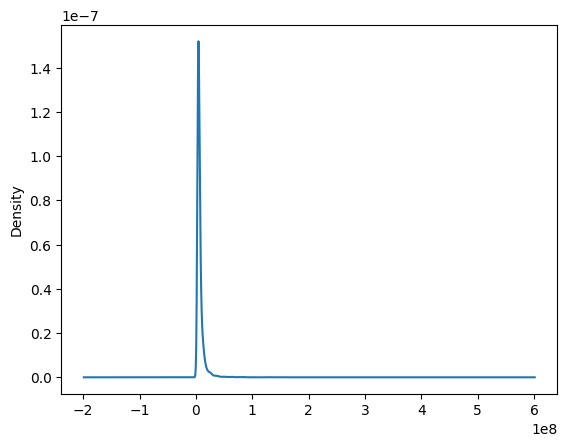

In [ ]:
df['last_price'].plot.density() #Вероятно, у нас преимущесвенно дешевые дома

<Axes: ylabel='Frequency'>

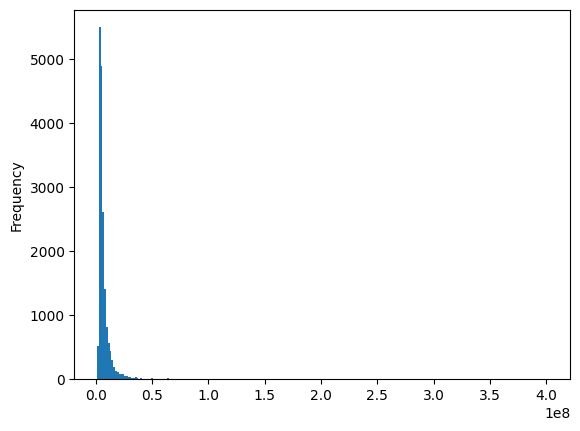

In [ ]:
df['last_price'].plot.hist(bins = 250)
# Возможно, если убрать роскошные, получится нормальное распределение. Хотя больше похоже на нисходящее распределение - с ростом цены уменьшается количество дорогой недвижимости, сходя к единицам объектов.
# Самых дешевых явно больше, чем самых дорогих.

<Axes: >

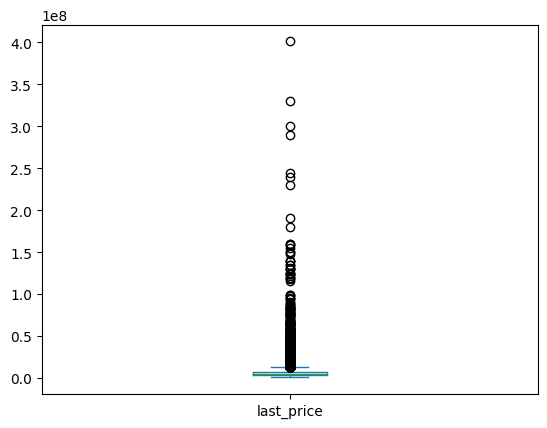

In [ ]:
df['last_price'].plot.box() # выбросов много даже с учетом того, что мы предвартельно почистили df

In [ ]:
df = df[df['last_price']  < 180000000] # уберем несколько максимумов

In [ ]:
df.describe() # остальсь 18600 значений. Посмотри, м.б. уменьшение размерности повлияет на нормальность распределения признака

last_price    total_area         rooms  floors_total   living_area  \
count  1.815900e+04  18159.000000  18159.000000  18083.000000  16880.000000   
mean   7.367222e+06     63.073620      2.136021     11.173644     35.962912   
std    8.379875e+06     37.030072      1.112318      6.543131     22.900971   
min    1.190000e+06     12.000000      0.000000      1.000000      6.000000   
25%    4.000000e+06     41.200000      1.000000      5.000000     19.100000   
50%    5.250000e+06     54.000000      2.000000      9.000000     31.000000   
75%    7.679000e+06     73.000000      3.000000     16.000000     43.500000   
max    1.600000e+08    631.200000     19.000000     60.000000    322.300000   

              floor  kitchen_area  airports_nearest  cityCenters_nearest  \
count  18159.000000  16598.000000      18136.000000         18159.000000   
mean       6.133322     10.919839      28794.958315         14200.757641   
std        4.945547      6.212451      12636.619106          8608.144467   
min        1.000000      1.300000          0.000000           181.000000   
25%        3.000000      7.100000      18577.500000          9241.000000   
50%        5.000000      9.700000      26726.000000         13107.000000   
75%        8.000000     12.200000      37288.000000         16295.000000   
max       33.000000    107.000000      84869.000000         65968.000000   

       parks_around3000  ponds_around3000  
count      18159.000000      18159.000000  
mean           0.610827          0.769205  
std            0.801636          0.937516  
min            0.000000          0.000000  
25%            0.000000          0.000000  
50%            0.000000          1.000000  
75%            1.000000          1.000000  
max            3.000000          3.000000

<Axes: ylabel='Frequency'>

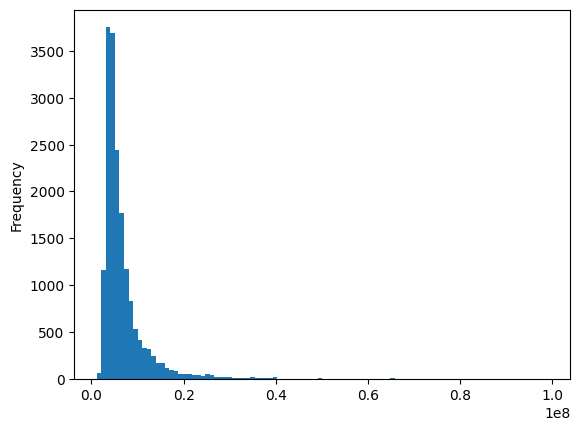

In [ ]:
ndf = df[df['last_price'] < 100000000] # еще сократим выборку
ndf['last_price'].plot.hist(bins = 100) #  нет, хвост все равно остается и чем выше цена, тем меньше обектов недвижимости

In [ ]:

st.normaltest(ndf['last_price']) # тем не менее, нормалтест показывает, что шанс того, что наша ( или более аномальная) выборка взята из нормально распредеденных данных - стремится к 0.

NormaltestResult(statistic=19721.82780974864, pvalue=0.0)

In [ ]:
st.shapiro(ndf['last_price']) # тест Шапиро-Уилка  показывает то же самое. Очищенная от сильных выбросов выборка не взята из нормального распределения
 #( плюс когда мы уменьшаем выборку, все равно появляютя новые выбросы - среднее и медиана тоже сильно сдвигаются)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18134.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.5184948525867774, pvalue=1.403794375490876e-112)

<Axes: ylabel='last_price'>

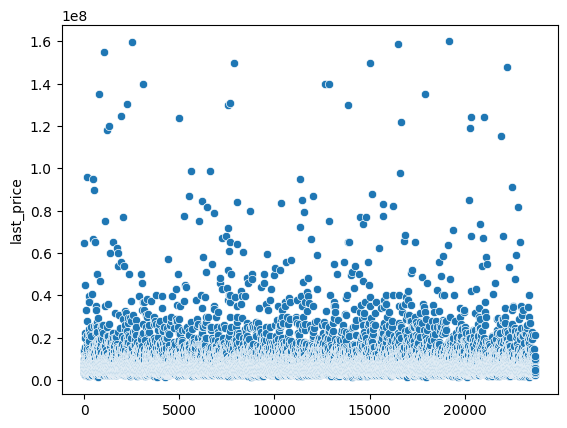

In [ ]:
# посмотрим как выглядит цена на scatterplot
sns.scatterplot(df['last_price'])

<Axes: ylabel='last_price'>

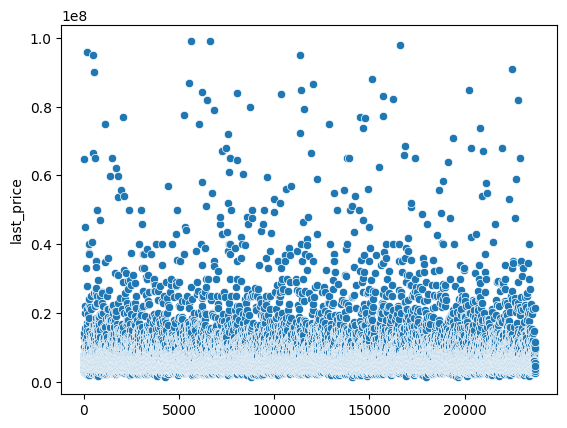

In [ ]:
sns.scatterplot(ndf['last_price'])

<ipython-input-63-810fae880fc6>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x ='last_price', hue = 'rooms')


<Axes: xlabel='last_price', ylabel='Density'>

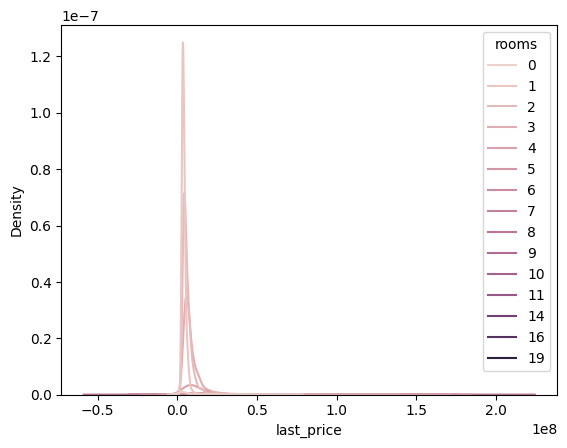

In [ ]:
sns.kdeplot(df, x ='last_price', hue = 'rooms')

<Axes: xlabel='last_price', ylabel='Density'>

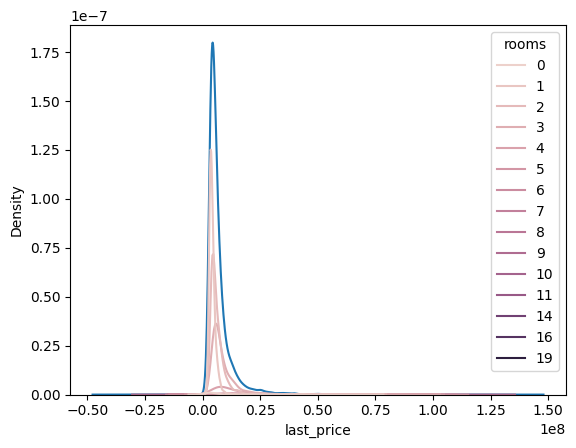

In [ ]:
ndf['last_price'].plot.density()
sns.kdeplot(ndf, x ='last_price', hue = 'rooms', warn_singular=False)

<Axes: xlabel='last_price', ylabel='Density'>

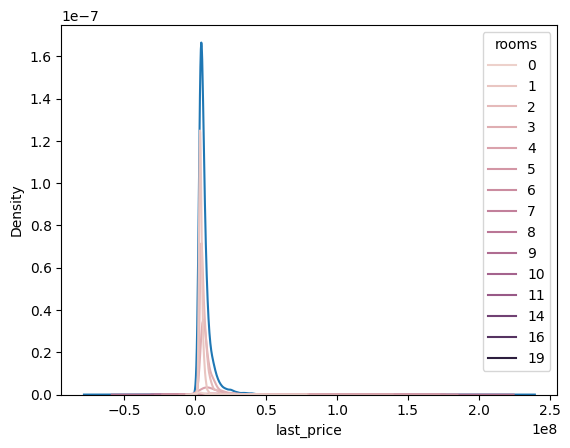

In [ ]:
df['last_price'].plot.density()
sns.kdeplot(df, x ='last_price', hue = 'rooms', warn_singular=False)

In [ ]:
#
def stat_hist_density_kdeHueRooms(table: pd.DataFrame, column:str):
    res = table[column].describe()
    print(res)
    graph = table[column].plot.hist(bins=100, density=True)
    table[column].plot.density(ax=graph)
    graph.set_xlim(table[column].min(), table[column].max())
    graph.set_xlabel(f"Столбец {column}")
    graph.set_ylabel(f'Плотность')
    graph.set_title(f"Плотность распределения признака {column}")
    sns.kdeplot(table, x = column, hue = 'rooms', warn_singular=False)


count    1.815900e+04
mean     7.367222e+06
std      8.379875e+06
min      1.190000e+06
25%      4.000000e+06
50%      5.250000e+06
75%      7.679000e+06
max      1.600000e+08
Name: last_price, dtype: float64


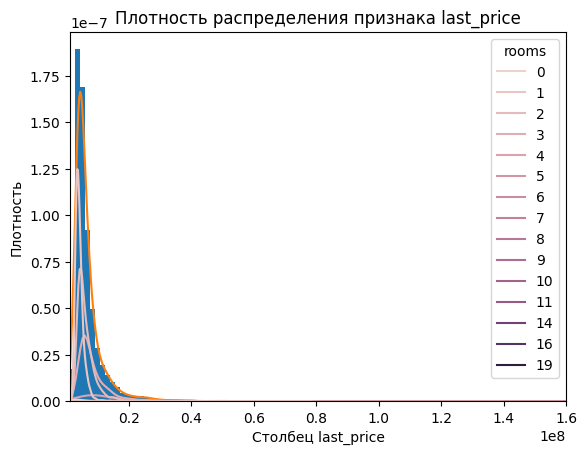

In [ ]:
# проверим работу функции на цене
stat_hist_density_kdeHueRooms(df, 'last_price')

count    18159.000000
mean        63.073620
std         37.030072
min         12.000000
25%         41.200000
50%         54.000000
75%         73.000000
max        631.200000
Name: total_area, dtype: float64


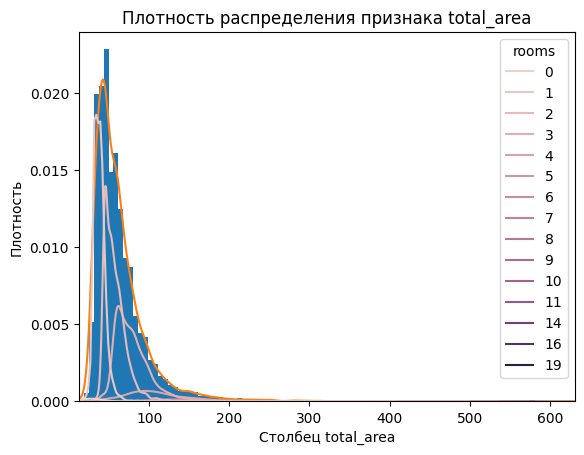

In [ ]:
stat_hist_density_kdeHueRooms(df, 'total_area')

<Axes: ylabel='total_area'>

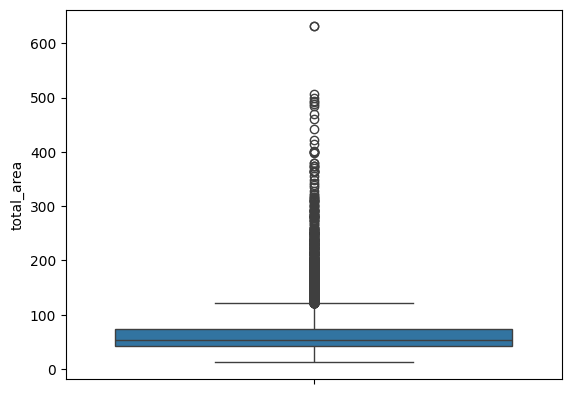

In [ ]:
sns.boxplot(df['total_area']) # посмотрим ящик

count    18155.000000
mean        62.962527
std         36.257391
min         12.000000
25%         41.200000
50%         54.000000
75%         73.000000
max        494.100000
Name: total_area, dtype: float64


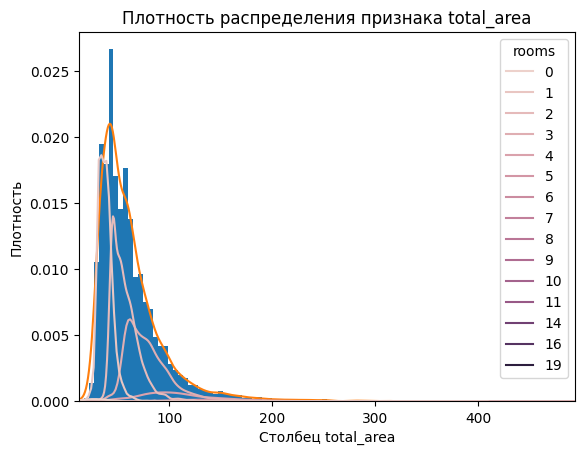

In [ ]:
df = df[df['total_area'] < 500] # уберем несколько самых экстремальных значений
stat_hist_density_kdeHueRooms(df, 'total_area')

<Axes: xlabel='last_price', ylabel='total_area'>

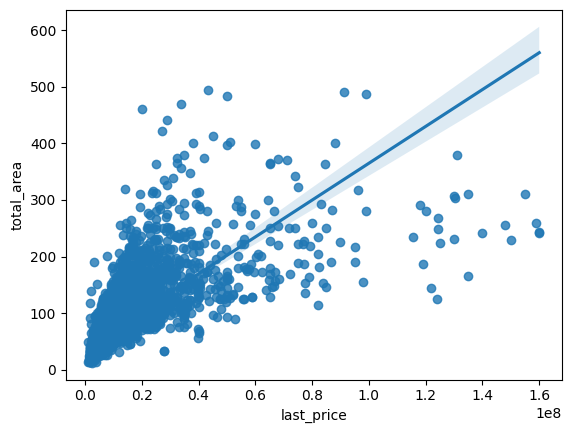

In [ ]:
# посмотрим зависимость между ценой и общей площадью
sns.regplot(df, x = 'last_price', y = 'total_area') # видно, что точки стремятся к прямой, особенно в значениях общей площади приерно до 150. Также видно, что с повышением пдощади растет и дисперсия

<Axes: xlabel='total_area', ylabel='last_price'>

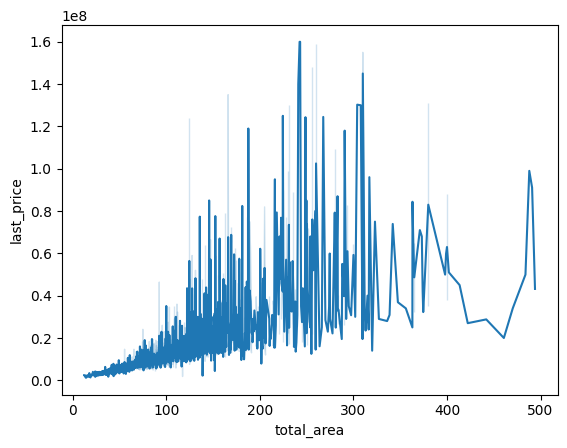

In [ ]:
sns.lineplot(df, x = 'total_area', y = 'last_price')

In [ ]:
st.shapiro(df['total_area']) # результат теста Шапиро-Уилка, тем не менее, близок к 0, т.е. шанс, что эта или более отличающаяся выборка
# взяты из нормально распределенной совокупности данных тоже стремится к 0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18155.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.7237477194298585, pvalue=2.6133721045013885e-98)

In [ ]:
st.normaltest(df['total_area']) # то же всамое можно сказать и по результатам normaltest

NormaltestResult(statistic=13716.622598793592, pvalue=0.0)

In [ ]:
# посмотрим на число комнат
df['rooms'].describe() # есть квартиры с аномально большим количеством комнат, но их единицы


count    18155.000000
mean         2.135224
std          1.110979
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    18155.000000
mean         2.135224
std          1.110979
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


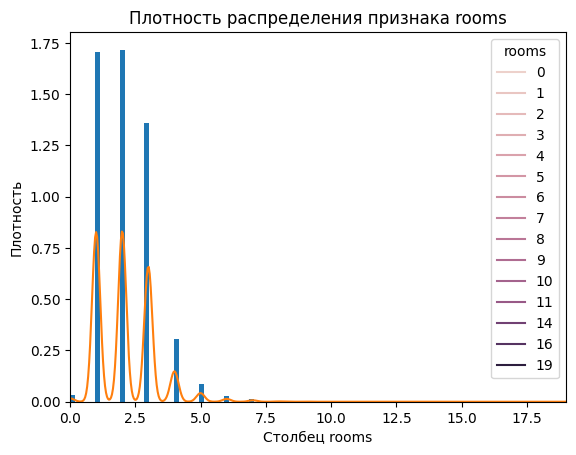

In [ ]:
stat_hist_density_kdeHueRooms(df, 'rooms') # тут не отобразился kde график, тольо шкала к нему построилась, потому что разделитьель у нас именно стролбец rooms
# видно что еста аномальные квартиры где 0 комнат (возможно, таковыми считаются студии), а также 4-19 комнат

<Axes: >

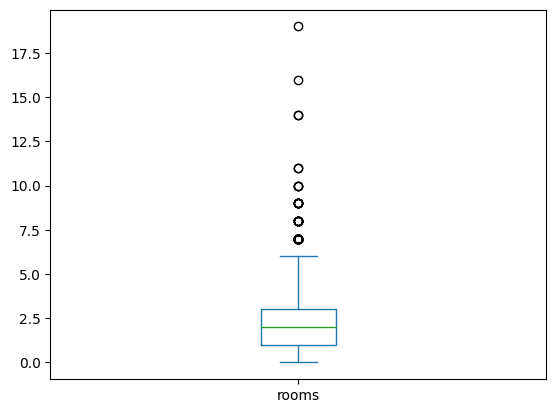

In [ ]:
df['rooms'].plot.box()

In [ ]:
df['rooms'].value_counts() # учитывая, что выборки меньше 30 значений слишком малы для обоснованных статистических выводов, оставим квартиры с числом комнат от 0 до 7

rooms
2     5923
1     5886
3     4696
4     1056
5      299
0      117
6       99
7       51
8       11
9        8
10       3
11       2
14       2
19       1
16       1
Name: count, dtype: int64

count    18127.000000
mean         2.123352
std          1.064721
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


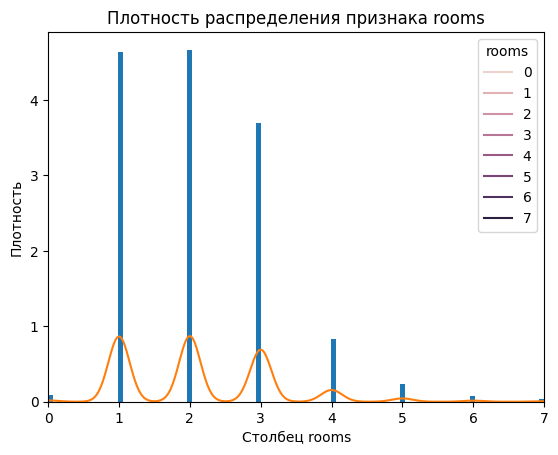

In [ ]:
df = df[df['rooms'] <= 7]
stat_hist_density_kdeHueRooms(df, 'rooms')

<Axes: >

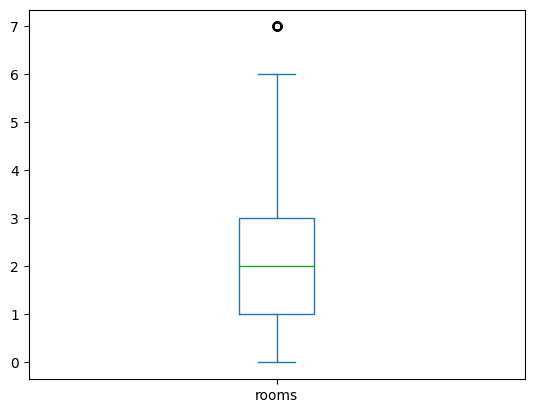

In [ ]:
df['rooms'].plot.box()

In [ ]:
df_rooms_0 = df[df['rooms'] == 0]
# любопытно, что есть 117 квартир, где вообще нет комнат/ (видимо, что-то типа студий).
# В таких квартирах площадь кухни возможно стоит заполнить нулями, потому что кухонь в них, видимо, нет
df_rooms_0

last_price  total_area  rooms  floors_total  living_area  floor  \
440       2480000       27.11      0          17.0        24.75      4   
508       3375000       34.40      0          26.0        24.30     19   
716       1500000       17.00      0           9.0        12.00      1   
1173      3240000       29.00      0          24.0        17.00      2   
1174      3900000       32.00      0          24.0        18.00      2   
...           ...         ...    ...           ...          ...    ...   
22832     2600000       28.00      0          16.0        16.80      9   
22867     3090000       30.00      0          25.0        18.20      5   
22877     4280000       28.00      0          19.0        18.00     10   
23210     3200000       26.00      0          25.0        18.00     16   
23554     3350000       26.00      0          19.0          NaN      8   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
440             NaN           38171.0              15015.0               0.0   
508             NaN           53115.0              19292.0               0.0   
716             NaN           18654.0              29846.0               0.0   
1173            NaN           35129.0              16293.0               0.0   
1174            NaN           44754.0               8409.0               1.0   
...             ...               ...                  ...               ...   
22832           NaN           19372.0              22796.0               0.0   
22867           NaN           35250.0              16414.0               0.0   
22877           NaN           18982.0               7206.0               0.0   
23210           NaN           11405.0              13222.0               0.0   
23554           NaN           18090.0              17092.0               0.0   

       ponds_around3000  
440                 2.0  
508                 1.0  
716                 0.0  
1173                1.0  
1174                0.0  
...                 ...  
22832               1.0  
22867               1.0  
22877               1.0  
23210               1.0  
23554               2.0  

[117 rows x 11 columns]

In [ ]:
df_rooms_0['kitchen_area'].value_counts() #да, в них нет данных о площади кухни. НАдо подумать, заполнять ли из чем-то или все же удалить

Series([], Name: count, dtype: int64)

Все же не хочеся дальше тянуть незаполненные значения Livingarea  и Kitchen_area, поскольку если мы будем смотреть на поведение этиз признаков в модели, все равно придеся удалять эти значения. сделаем это сечас.

In [ ]:
df = df.dropna(subset=['living_area'])
df.info()
df = df.dropna(subset=['kitchen_area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16851 entries, 0 to 23694
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           16851 non-null  int64  
 1   total_area           16851 non-null  float64
 2   rooms                16851 non-null  int64  
 3   floors_total         16802 non-null  float64
 4   living_area          16851 non-null  float64
 5   floor                16851 non-null  int64  
 6   kitchen_area         16285 non-null  float64
 7   airports_nearest     16831 non-null  float64
 8   cityCenters_nearest  16851 non-null  float64
 9   parks_around3000     16851 non-null  float64
 10  ponds_around3000     16851 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Index: 16285 entries, 0 to 23694
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  

In [ ]:
df = df.dropna(subset=['kitchen_area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16285 entries, 0 to 23694
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           16285 non-null  int64  
 1   total_area           16285 non-null  float64
 2   rooms                16285 non-null  int64  
 3   floors_total         16249 non-null  float64
 4   living_area          16285 non-null  float64
 5   floor                16285 non-null  int64  
 6   kitchen_area         16285 non-null  float64
 7   airports_nearest     16265 non-null  float64
 8   cityCenters_nearest  16285 non-null  float64
 9   parks_around3000     16285 non-null  float64
 10  ponds_around3000     16285 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


count    16285.000000
mean         2.143015
std          1.049380
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


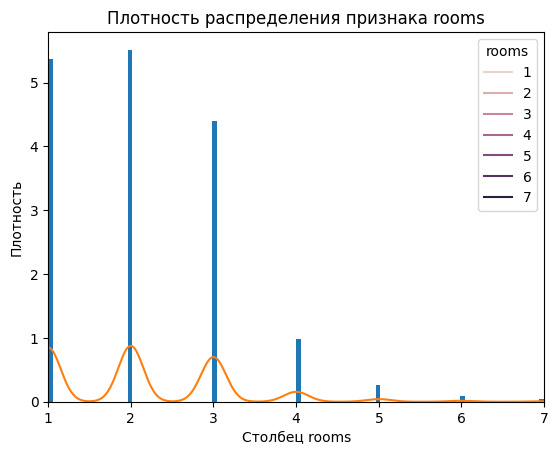

In [ ]:
# как поменялись описательные статистики
stat_hist_density_kdeHueRooms(df, 'rooms') # ушли квартиры с 0 комнат

<Axes: xlabel='last_price', ylabel='rooms'>

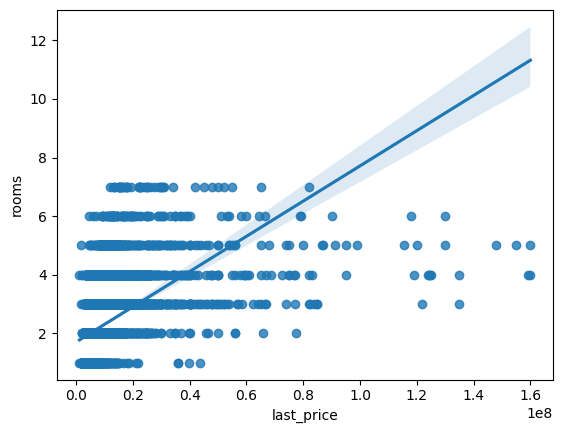

In [ ]:
# посмотрим зависимость между ценой и количеством комнат
sns.regplot(df, x = 'last_price', y = 'rooms') # учитывая дискретность признака, зависимости на данном графике не видно

count    16249.000000
mean        11.064866
std          6.472928
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


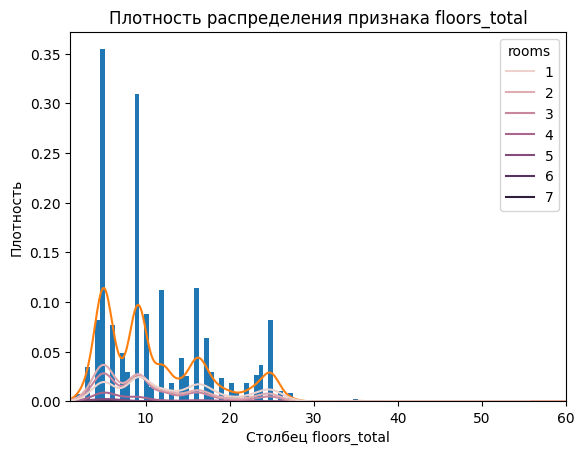

In [ ]:
# посмотрим что с этажностью дома
stat_hist_density_kdeHueRooms(df, 'floors_total')

In [ ]:
df['floors_total'].value_counts()

floors_total
5.0     3397
9.0     2972
16.0    1097
12.0    1080
10.0     840
4.0      789
25.0     787
6.0      736
17.0     610
7.0      467
14.0     420
24.0     348
3.0      334
8.0      287
18.0     284
23.0     255
15.0     244
19.0     226
13.0     180
20.0     177
22.0     174
11.0     141
26.0     104
21.0      92
27.0      82
2.0       75
35.0      22
28.0      16
1.0        5
36.0       3
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: count, dtype: int64

<Axes: >

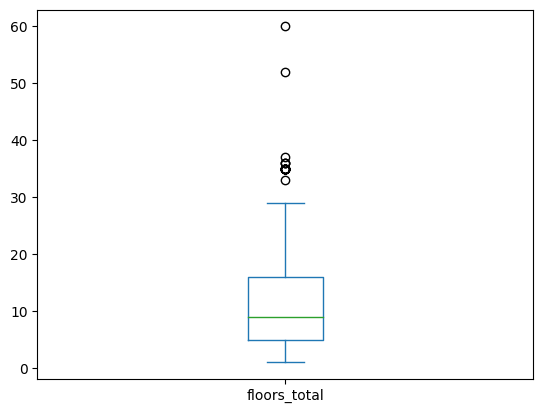

In [ ]:
df['floors_total'].plot.box() # мало квартир в очень высоких домах

In [ ]:
df[df['floors_total'] > 30] # тем не менее, это квартиры с довольно типовыми показателями, поэтому удалять их не вижу смысла

last_price  total_area  rooms  floors_total  living_area  floor  \
397       5990000        54.0      2          36.0         21.4     28   
871       7777777        75.0      2          35.0         40.5     23   
1060      5200000        50.0      2          35.0         39.0     15   
1917     10150000        74.0      2          35.0         34.4     30   
2253      3800000        45.5      2          60.0         27.4      4   
2966      4300000        37.0      1          35.0         14.0     15   
4855      5500000        50.0      1          35.0         22.0      4   
5807      8150000        80.0      2          36.0         41.0     13   
5808      4590000        43.0      1          35.0         14.0     11   
7236      4599000        42.0      1          35.0         15.0     12   
8496      7500000        73.3      3          35.0         28.0     27   
9186      6500000        49.1      1          35.0         31.0      3   
9370      7390000        70.0      2          35.0         28.0      3   
11079     9200000        75.0      2          36.0         40.0     29   
11575     9900000       101.0      3          33.0         53.0     32   
12888     7600000        70.0      3          35.0         36.5     27   
12960     6140000        54.0      2          35.0         26.6     13   
13975     6990000        65.0      2          35.0         32.1     23   
14347     8595000        69.7      2          35.0         27.4     26   
15982     5900000        62.0      2          35.0         34.0      9   
16731     3978000        40.0      1          52.0         10.5     18   
16934     4100000        40.0      1          37.0         17.4      5   
18218     9900000       101.0      3          35.0         53.4     33   
18617     7350000        68.5      2          35.0         27.0      3   
18629     5700000        54.0      1          35.0         21.0     31   
20938     9900000       100.9      3          35.0         53.4     22   
21599     6200000        51.0      2          35.0         27.0     13   
21809    10600000        77.0      2          35.0         39.0     11   
22946     7690000        75.0      2          35.0         40.0      8   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
397           18.70           18732.0              20444.0               0.0   
871           11.70           18732.0              20444.0               0.0   
1060          20.50           18732.0              20444.0               0.0   
1917          13.00           18732.0              20444.0               0.0   
2253           7.40           67763.0              49488.0               2.0   
2966          10.40           18732.0              20444.0               0.0   
4855          13.00           18627.0              20339.0               1.0   
5807          12.00           18732.0              20444.0               0.0   
5808          15.00           18732.0              20444.0               0.0   
7236          11.00           18732.0              20444.0               0.0   
8496          23.10           18732.0              20444.0               0.0   
9186           7.00           18732.0              20444.0               0.0   
9370          23.00           18732.0              20444.0               0.0   
11079         12.00           18732.0              20444.0               0.0   
11575         21.00           18732.0              20444.0               0.0   
12888         23.10           18732.0              20444.0               0.0   
12960         19.10           18732.0              20444.0               0.0   
13975          8.90           18732.0              20444.0               0.0   
14347         23.30           18732.0              20444.0               0.0   
15982         10.00           18732.0              20444.0               0.0   
16731         14.00           20728.0              12978.0               1.0   
16934          8.34       

<Axes: xlabel='last_price', ylabel='floors_total'>

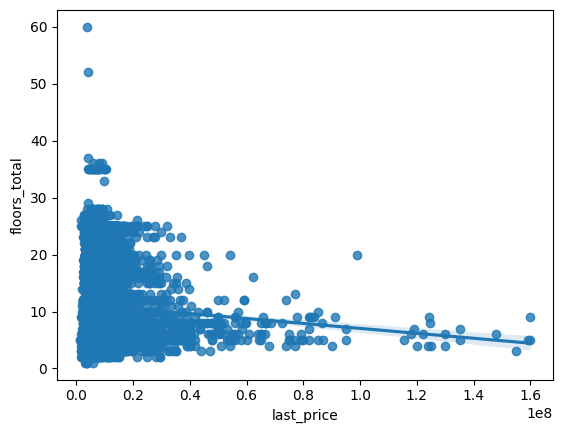

In [ ]:
sns.regplot(df, x = 'last_price', y = 'floors_total') # несмотря на дискретность признака, некоторая отрицательная зависимость c ценой на данном графике прослеживается, но она скорее для зданий определенной высоты (от 5 до 12 примерно этажей)

In [ ]:
df['Floors_total_marker'] = 0
for i in range(len(df['floors_total'])):
    try:
        if (df['floors_total'][i]) == 5:
            df['Floors_total_marker'][i] = 1
        elif (df['floors_total'][i]) == 9:
            df['Floors_total_marker'][i] = 2
    except:
        continue


df['Floors_total_marker'].value_counts()

Выходные данные были обрезаны до нескольких последних строк (5000).
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Floors_total_marker'][i] = 1
<ipython-input-92-757827346aa2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Floors_total_marker'][i] = 1
<ipython-input-92-757827346aa2>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example i

Floors_total_marker
0    11886
1     2357
2     2042
Name: count, dtype: int64

<Axes: xlabel='last_price', ylabel='Density'>

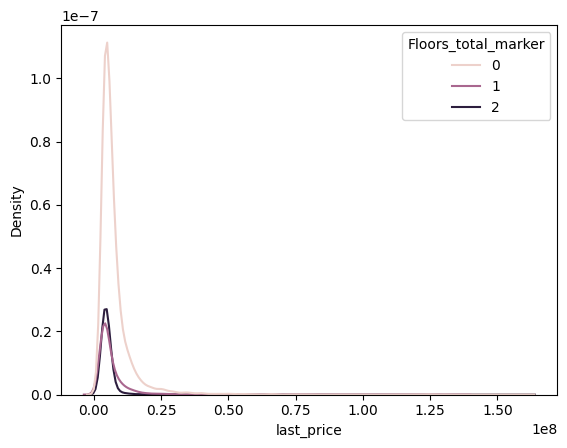

In [ ]:
sns.kdeplot(df, x = 'last_price', hue = 'Floors_total_marker') #

<Axes: xlabel='floors_total', ylabel='last_price'>

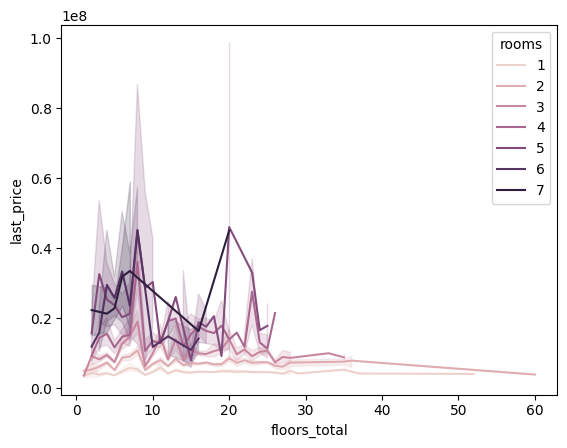

In [ ]:
sns.lineplot(df, x = 'floors_total', y = 'last_price', hue = 'rooms')

In [ ]:
# пока подумаем надо ли брать этот столбец в модель и попозже удалим пропуски значений если решим брать
# поскольку мнгго 5 и 9 этажных домов, возможно, есть смысл выделить их и позже рассмотреть по ним
df_5_floors = df[df['floors_total'] == 5]
df_9_floors = df[df['floors_total'] == 9]
df_other_number_of_floors = df[(df['floors_total'] != 9) & (df['floors_total'] != 5)]

<Axes: xlabel='rooms', ylabel='last_price'>

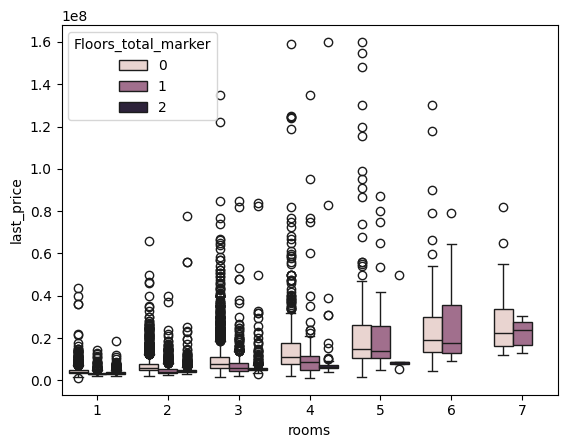

In [ ]:
sns.boxplot(df, x = 'rooms', y = 'last_price', hue = 'Floors_total_marker')

<Axes: xlabel='rooms', ylabel='last_price'>

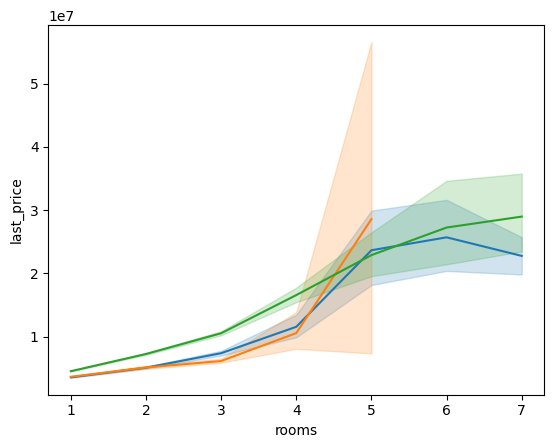

In [ ]:
sns.lineplot(df_5_floors, x = 'rooms', y = 'last_price') # синий
sns.lineplot(df_9_floors, x = 'rooms', y = 'last_price') # оранжевый
sns.lineplot(df_other_number_of_floors, x = 'rooms', y = 'last_price') # зеленый

# из данного графика видно, что количество комнат больше 3х сильно увеличивает цену. 5тикомнатные квартиры в 9тиэтажках выходят дороже, чем в домах с другой этажностью (но и доверительный интервал тут гигантский, видимо мало значений).
# НО больше 5ти комнат в 9тиэтажке в наших данных не встречается
# как ни странно, но в наших жанных 3 и 4 рехкомнатные квартирыв 5тиэтажках несколько дороже, чем в 9ти этажках.

count    16285.000000
mean        35.853334
std         21.929930
min          6.000000
25%         19.300000
50%         31.000000
75%         43.500000
max        312.500000
Name: living_area, dtype: float64


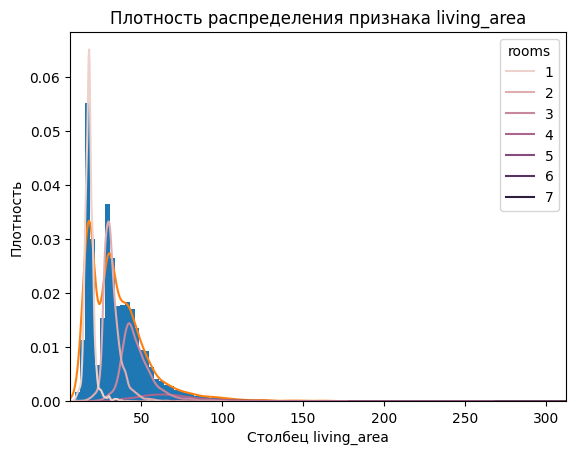

In [ ]:
# посмотрим новые описательные статистики для living_area
stat_hist_density_kdeHueRooms(df, 'living_area')
# выбросы все равно остались. лотность распределения скачет в зависимости от числа комнат, но все равно не похоже на нормальное

<Axes: ylabel='living_area'>

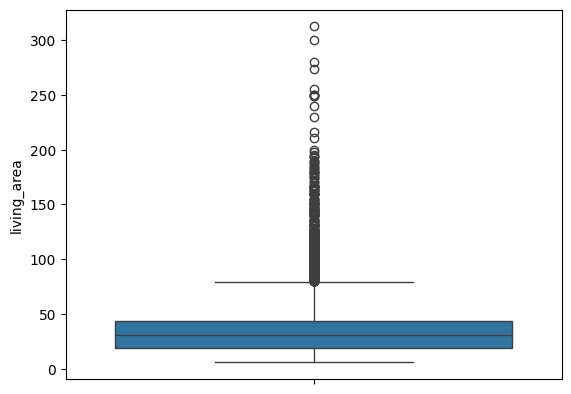

In [ ]:
sns.boxplot(df['living_area']) #  похоже, что с уеньшением df сдвигаются и сердинные значения, что дает постоянство выбросов.

In [ ]:
# Но из интереса проверим тестами данные, разделенные на группы по количству комнат
df_rooms_1 = df[df['rooms'] == 1]

df_rooms_2 = df[df['rooms'] == 2]
df_rooms_3 = df[df['rooms'] >= 3]


In [ ]:
st.shapiro(df_rooms_1['living_area']) #

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5244.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.7788860030046632, pvalue=1.6872074724269367e-64)

In [ ]:
st.normaltest(df_rooms_1['living_area'])

NormaltestResult(statistic=4106.0124146247, pvalue=0.0)

In [ ]:
st.shapiro(df_rooms_2['living_area'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5389.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8444326847573581, pvalue=2.064584919305163e-58)

In [ ]:
st.normaltest(df_rooms_2['living_area'])

NormaltestResult(statistic=2654.0020937963523, pvalue=0.0)

In [ ]:
st.shapiro(df_rooms_3['living_area'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5652.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.7028737217956622, pvalue=5.00496247014476e-72)

In [ ]:
st.normaltest(df_rooms_3['living_area']) # как мы ни пытаемся найти нормальное распределение, в этих данных его нет

NormaltestResult(statistic=4010.736038502175, pvalue=0.0)

<Axes: xlabel='last_price', ylabel='living_area'>

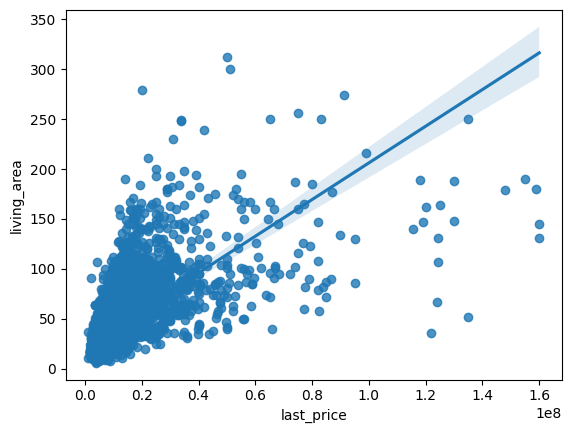

In [ ]:
sns.regplot(df, x = 'last_price', y = 'living_area') # тенденция зависимости цены и жилой площади видна, но ярко прослеживается где-то до площади в 100 кв.м

<Axes: xlabel='living_area', ylabel='last_price'>

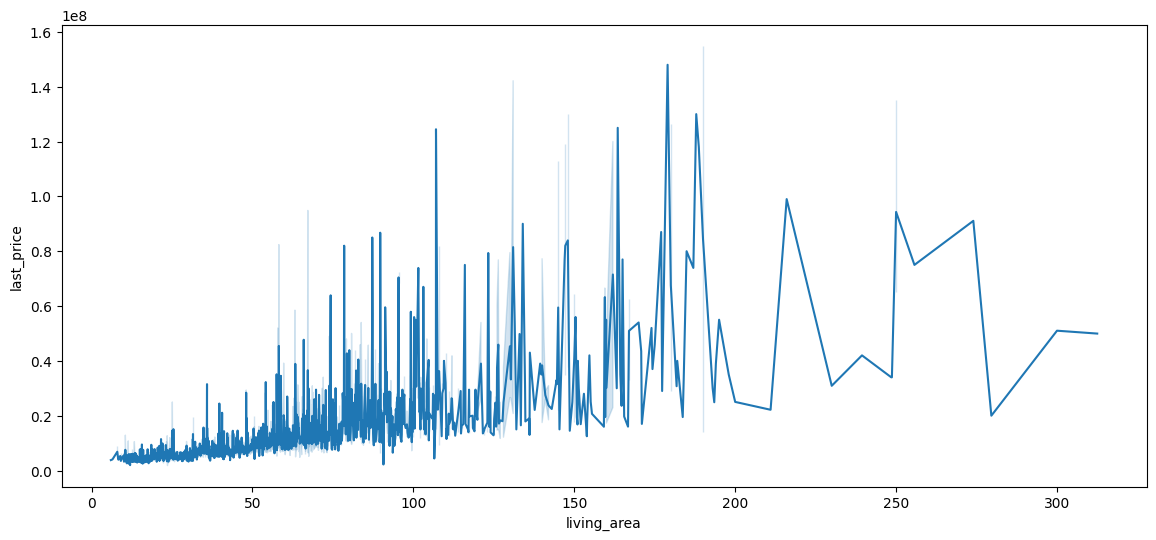

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(df, x = 'living_area', y = 'last_price') # тред c шумом, но довольно четкий в небольших жилых площадях, но с ростом жилой площади (и уменьшением количества объектов), линия ломается

count    16285.000000
mean         6.092601
std          4.887008
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


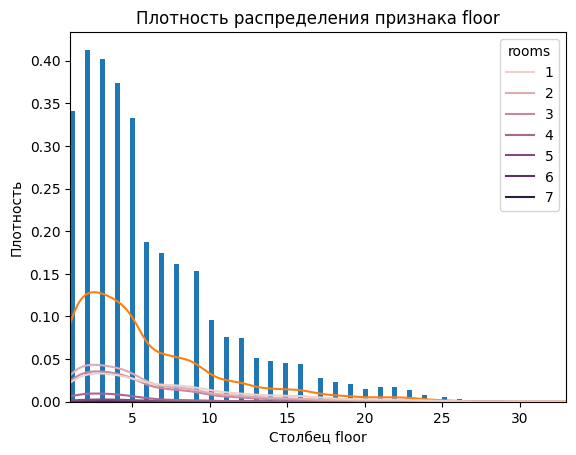

In [ ]:
# посмотрм на признак этажа
stat_hist_density_kdeHueRooms(df, 'floor')

<Axes: ylabel='floor'>

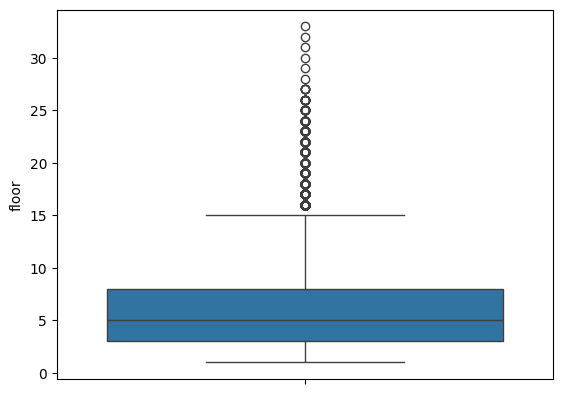

In [ ]:
sns.boxplot(df['floor']) # снова много выбросов (выше 15 этажа)

In [ ]:
df[df['floor'] > 15] # 1033 строки. Тем не менее, уменьшать размерность и убирать эти выбросы не хочется, т.к. на первый взгляд это не какие-то экстремально выделяющиеся квартиры

last_price  total_area  rooms  floors_total  living_area  floor  \
25        6800000        76.0      2          23.0         39.0     18   
40        3590000        36.0      1          26.0         15.0     22   
75        4950000        44.0      2          23.0         21.0     19   
83        4200000        41.4      1          25.0         16.5     20   
113       5750000        78.0      3          27.0         45.4     27   
...           ...         ...    ...           ...          ...    ...   
23553     4000000        39.0      1          24.0         18.0     16   
23585     5953044        89.6      3          23.0         47.7     17   
23590    21187872       123.3      3           NaN         50.4     18   
23657     5990000        64.0      2          19.0         31.0     16   
23684    21400000       145.0      4          26.0         71.4     17   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
25             15.0           34967.0              14640.0               0.0   
40             10.0           52996.0              19143.0               0.0   
75             15.0           15749.0              14545.0               0.0   
83             10.2           53554.0              19107.0               0.0   
113            10.8           53134.0              19311.0               0.0   
...             ...               ...                  ...               ...   
23553          11.0           43074.0              10820.0               0.0   
23585          16.7           26726.0               8880.0               0.0   
23590          23.6           19095.0               4529.0               0.0   
23657          11.0           37636.0              14479.0               0.0   
23684          15.6           11827.0              11459.0               0.0   

       ponds_around3000  Floors_total_marker  
25                  1.0                    0  
40                  0.0                    0  
75                  0.0                    0  
83                  0.0                    0  
113                 0.0                    0  
...                 ...                  ...  
23553               0.0                    0  
23585               1.0                    0  
23590               0.0                    0  
23657               1.0                    0  
23684               0.0                    0  

[1032 rows x 12 columns]

<Axes: xlabel='floor', ylabel='last_price'>

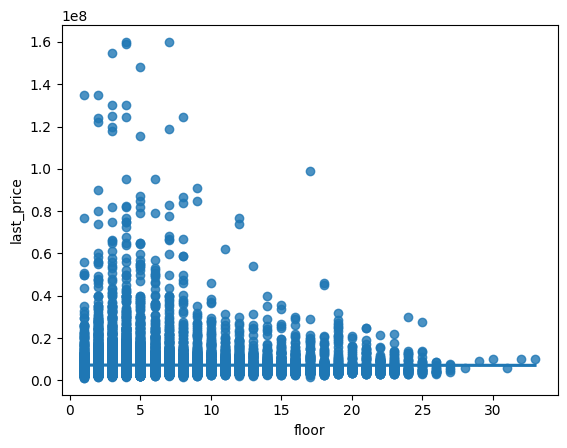

In [ ]:
sns.regplot(df, x = "floor", y = 'last_price') # явно влияет не тольо этаж.хотя точки распредедены дискретно, но часть из них как будто следует за прямойsns.regplot(df, x = "floor", y = 'last_price')

<Axes: xlabel='floor', ylabel='last_price'>

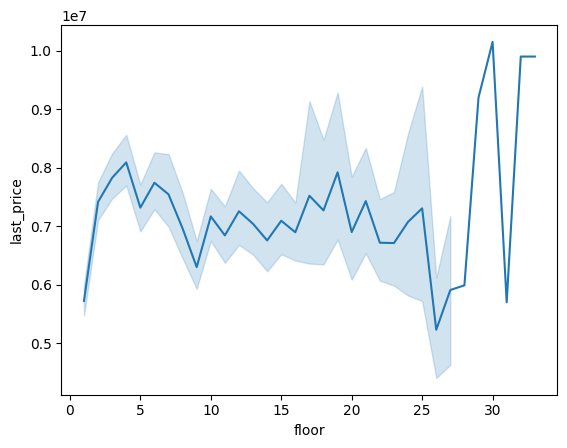

In [ ]:
sns.lineplot(df, x = "floor", y = 'last_price') # а по lineplot другая картина, более хаотичная и видны большие доверительные интервалы
# 1 и 9 этажи снижают стоимость. в целом 'зубцы' могут быть связаны с тем, что последний этаж может снижать стоимость квартиры (если это постсоветское пространство - то протекают крыши, такие квартиры не всем нравятся)
# любопытно, что в наших данных 36 или 27 этаж оценен еще ниже, чем все 1ые

In [ ]:
# Use `df.loc[row_indexer, "col"] = values` instead
#df['First_floor_marker'] = 0
#for i in range(len(df['floor'])):
 #   if df.iloc[i,'floor'] == 1:
 #       df.iloc[i,'First_floor_marker'] = 1

#df

In [ ]:
df['First_floor_marker'] = df['floor'] == 1
df

last_price  total_area  rooms  floors_total  living_area  floor  \
0        13000000      108.00      3          16.0         51.0      8   
1         3350000       40.40      1          11.0         18.6      1   
2         5196000       56.00      2           5.0         34.3      4   
4        10000000      100.00      2          14.0         32.0     13   
6         3700000       37.30      1          26.0         10.6      6   
...           ...         ...    ...           ...          ...    ...   
23689     3550000       35.30      1          15.0         16.3      4   
23690     5500000       52.00      2           5.0         31.0      2   
23691     9470000       72.90      2          25.0         40.3      7   
23693     4600000       62.40      3           9.0         40.0      8   
23694     9700000      133.81      3           5.0         73.3      3   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
0             25.00           18863.0              16028.0               1.0   
1             11.00           12817.0              18603.0               0.0   
2              8.30           21741.0              13933.0               1.0   
4             41.00           31856.0               8098.0               2.0   
6             14.40           52996.0              19143.0               0.0   
...             ...               ...                  ...               ...   
23689          9.10           17284.0              16081.0               1.0   
23690          6.00           20151.0               6263.0               1.0   
23691         10.60           19424.0               4489.0               0.0   
23693          8.00           45602.0              34104.0               1.0   
23694         13.83           24665.0               4232.0               1.0   

       ponds_around3000  Floors_total_marker  First_floor_marker  
0                   2.0                    0               False  
1                   0.0                    0                True  
2                   2.0                    1               False  
4                   1.0                    0               False  
6                   0.0                    0               False  
...                 ...                  ...                 ...  
23689               2.0                    0               False  
23690               0.0                    0               False  
23691               1.0                    0               False  
23693               1.0                    0               False  
23694               3.0                    0               False  

[16285 rows x 13 columns]

In [ ]:
#df['Last_floor_marker'] = 0
#for i in range(len(df['floor'])):
#    if (df['floor'][i]) == (df['floors_total'][i]):
 #       df['Last_floor_marker'][i] = 1

#df

In [ ]:
df['Last_floor_marker'] = (df['floor'] == df['floors_total']) & (df['floor'] != 1)
df

last_price  total_area  rooms  floors_total  living_area  floor  \
0        13000000      108.00    3.0          16.0         51.0      8   
1         3350000       40.40    1.0          11.0         18.6      1   
2         5196000       56.00    2.0           5.0         34.3      4   
4        10000000      100.00    2.0          14.0         32.0     13   
6         3700000       37.30    1.0          26.0         10.6      6   
...           ...         ...    ...           ...          ...    ...   
23689     3550000       35.30    1.0          15.0         16.3      4   
23690     5500000       52.00    2.0           5.0         31.0      2   
23691     9470000       72.90    2.0          25.0         40.3      7   
23693     4600000       62.40    3.0           9.0         40.0      8   
23694     9700000      133.81    3.0           5.0         73.3      3   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
0             25.00           18863.0              16028.0               1.0   
1             11.00           12817.0              18603.0               0.0   
2              8.30           21741.0              13933.0               1.0   
4             41.00           31856.0               8098.0               2.0   
6             14.40           52996.0              19143.0               0.0   
...             ...               ...                  ...               ...   
23689          9.10           17284.0              16081.0               1.0   
23690          6.00           20151.0               6263.0               1.0   
23691         10.60           19424.0               4489.0               0.0   
23693          8.00           45602.0              34104.0               1.0   
23694         13.83           24665.0               4232.0               1.0   

       ponds_around3000  Floors_total_marker  First_floor_marker  \
0                   2.0                    0                   0   
1                   0.0                    0                   1   
2                   2.0                    1                   0   
4                   1.0                    0                   0   
6                   0.0                    0                   0   
...                 ...                  ...                 ...   
23689               2.0                    0                   0   
23690               0.0                    0                   0   
23691               1.0                    0                   0   
23693               1.0                    0                   0   
23694               3.0                    0                   0   

       Last_floor_marker  price_per_sq_meter  
0                  False       120370.370370  
1                  False        82920.792079  
2                  False        92785.714286  
4                  False       100000.000000  
6                  False        99195.710456  
...                  ...                 ...  
23689              False       100566.572238  
23690              False       105769.230769  
23691              False       129903.978052  
23693              False        73717.948718  
23694              False        72490.845228  

[16285 rows x 15 columns]

In [ ]:
# переведем булевые столбцы в числовые
df['First_floor_marker'] = df['First_floor_marker'].astype('int64')
df['First_floor_marker'].value_counts(normalize = True)

First_floor_marker
0    0.890943
1    0.109057
Name: proportion, dtype: float64

In [ ]:
df['Last_floor_marker'] = df['Last_floor_marker'].astype('int64')
df['Last_floor_marker'].value_counts(normalize = True)

Last_floor_marker
0    0.870372
1    0.129628
Name: proportion, dtype: float64

<Axes: xlabel='rooms', ylabel='last_price'>

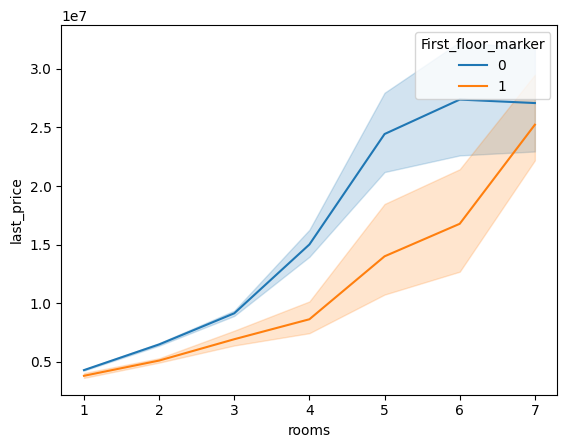

In [ ]:
sns.lineplot(df, x = "rooms", y = 'last_price', hue = 'First_floor_marker')

<Axes: xlabel='rooms', ylabel='last_price'>

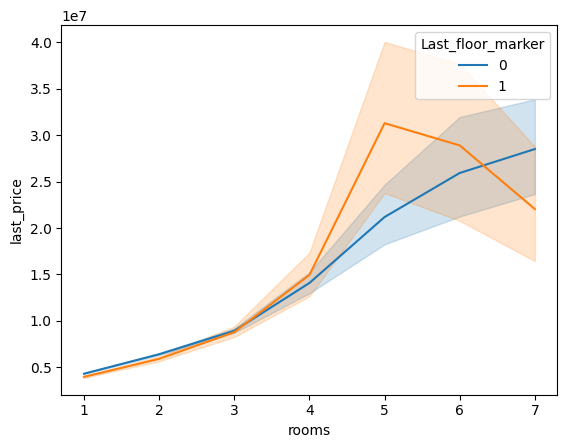

In [ ]:
sns.lineplot(df, x = "rooms", y = 'last_price', hue = 'Last_floor_marker')

<Axes: xlabel='rooms', ylabel='last_price'>

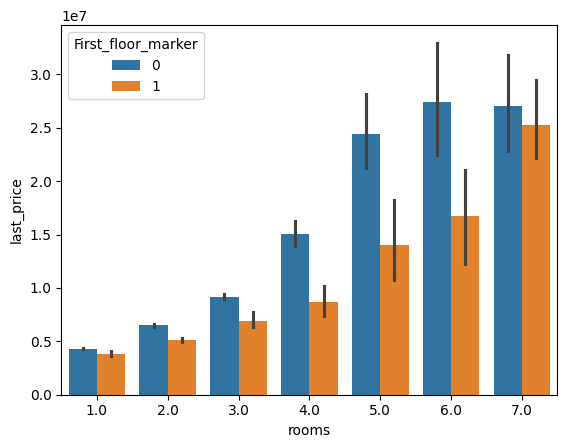

In [ ]:
sns.barplot(df, x = "rooms", y = 'last_price', hue = 'First_floor_marker')

<Axes: xlabel='rooms', ylabel='last_price'>

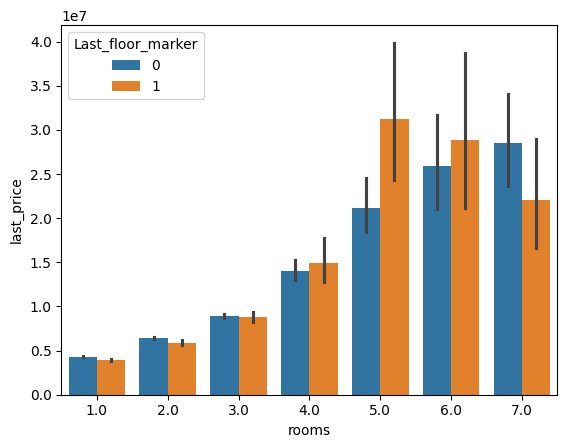

In [ ]:
sns.barplot(df, x = "rooms", y = 'last_price', hue = 'Last_floor_marker')

<Axes: xlabel='total_area', ylabel='last_price'>

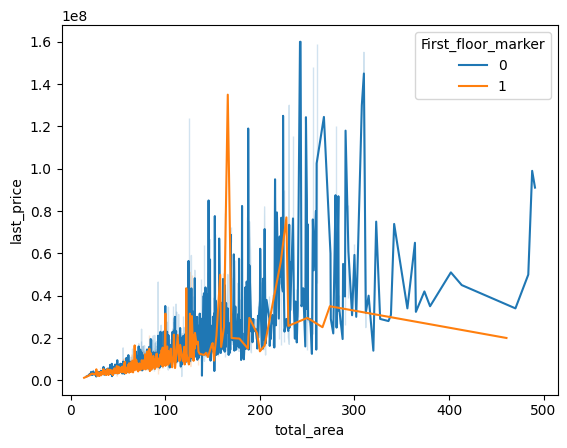

In [ ]:
sns.lineplot(df, x = "total_area", y = 'last_price', hue = 'First_floor_marker')

<Axes: xlabel='total_area', ylabel='last_price'>

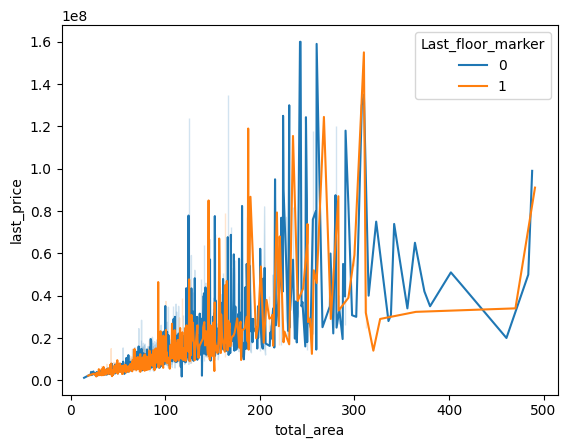

In [ ]:
sns.lineplot(df, x = "total_area", y = 'last_price', hue = 'Last_floor_marker')

<Axes: xlabel='floor', ylabel='last_price'>

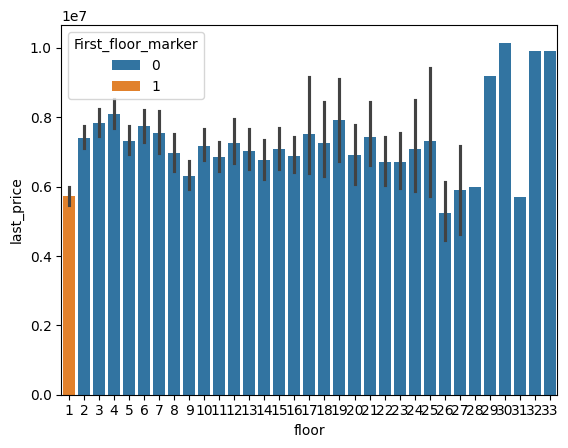

In [ ]:
sns.barplot(df, x = "floor", y = 'last_price', hue = 'First_floor_marker')

<Axes: xlabel='floor', ylabel='last_price'>

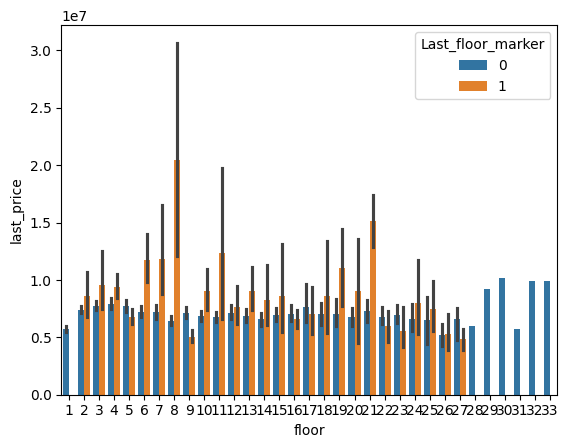

In [ ]:
sns.barplot(df, x = "floor", y = 'last_price', hue = 'Last_floor_marker')

count    16285.000000
mean        10.834558
std          6.110742
min          1.300000
25%          7.000000
50%          9.500000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


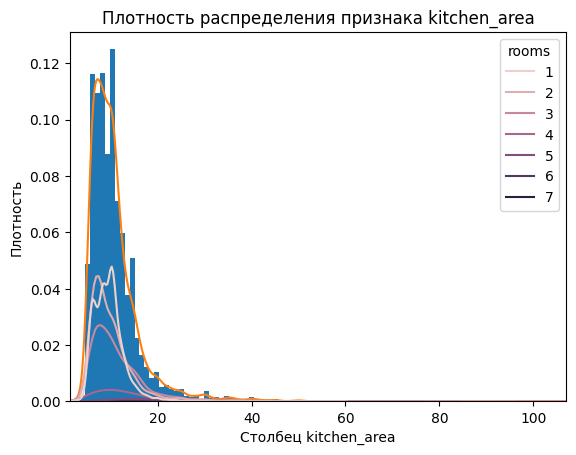

In [ ]:
# посмотрим на площадб кухни
stat_hist_density_kdeHueRooms(df, 'kitchen_area')

<Axes: ylabel='kitchen_area'>

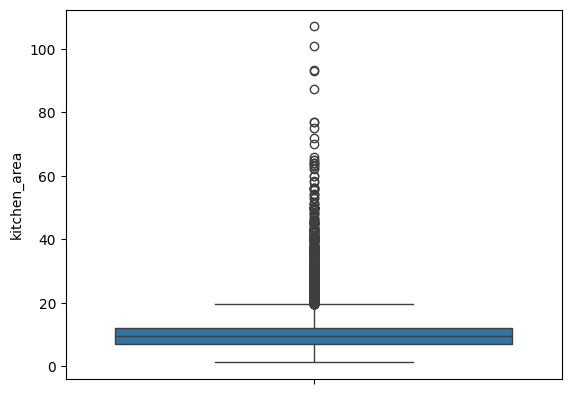

In [ ]:
sns.boxplot(df['kitchen_area'])

In [ ]:
df[df['kitchen_area'] >= 80] # в топе выбросов квартиры с большими площадями из -3 комнат. Но уменьшати на них df почему-то не хочется терять данные, итак много отсеяли

last_price  total_area  rooms  floors_total  living_area  floor  \
2489     12500000       255.0      3           2.0        153.9      2   
10867    56844500       177.9      3           6.0         87.2      5   
16239    82400000       181.1      3           9.0         58.2      4   
16797    65850000       146.0      2           9.0         40.0      3   
20215    85000000       249.7      3          10.0         72.0      9   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
2489          100.7           29544.0               6916.0               0.0   
10867          87.2           21860.0                318.0               2.0   
16239          93.2           25525.0               5845.0               2.0   
16797          93.0           25525.0               5845.0               2.0   
20215         107.0           31532.0               4624.0               1.0   

       ponds_around3000  Floors_total_marker  First_floor_marker  \
2489                3.0                    0                   0   
10867               3.0                    0                   0   
16239               0.0                    2                   0   
16797               0.0                    0                   0   
20215               2.0                    0                   0   

       Last_floor_marker  
2489                   1  
10867                  0  
16239                  0  
16797                  0  
20215                  0

<Axes: xlabel='kitchen_area', ylabel='last_price'>

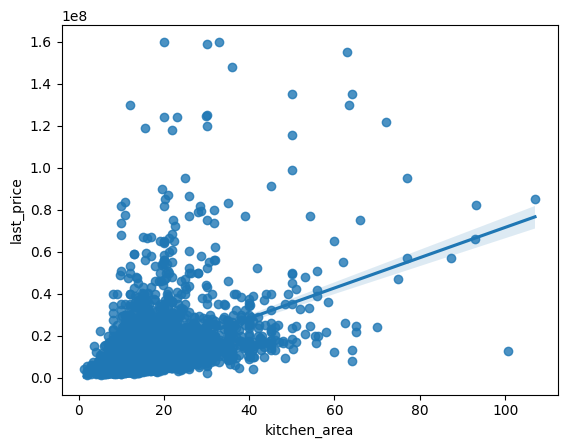

In [ ]:
sns.regplot(df, x = "kitchen_area", y = 'last_price') # данный признак тоже имеет явную корреляцию с ценой, но и рассеян достаточно сильно

<Axes: xlabel='kitchen_area', ylabel='last_price'>

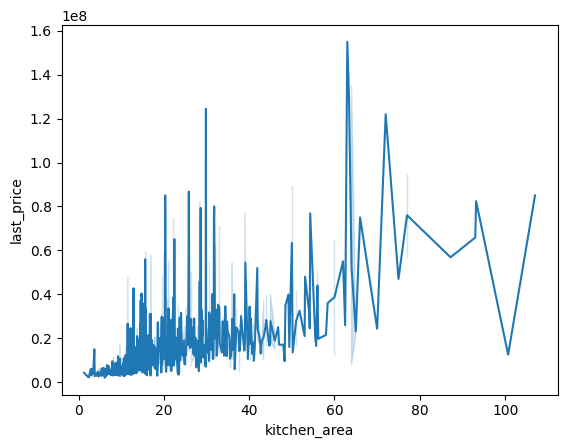

In [ ]:
sns.lineplot(df, x = "kitchen_area", y = 'last_price') # общий тренд зависимости идет, но после 40 нащрастает хаотичность и разброс значений, достигая апогея в конце

In [ ]:
# на всякий случай проверим тестами,хотя по графикам нет нормального распредедения
st.shapiro(df['kitchen_area'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16285.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.6943498961861656, pvalue=4.4596776088573486e-98)

In [ ]:
st.normaltest(df['kitchen_area']) # да, по тестам гипотеза о том, что такие или более аномальные данные можно взять из нормально распределенной выборки - не подтверждается

NormaltestResult(statistic=13827.651713428746, pvalue=0.0)

count    16265.000000
mean     28783.999385
std      12652.383037
min          0.000000
25%      18539.000000
50%      26711.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64


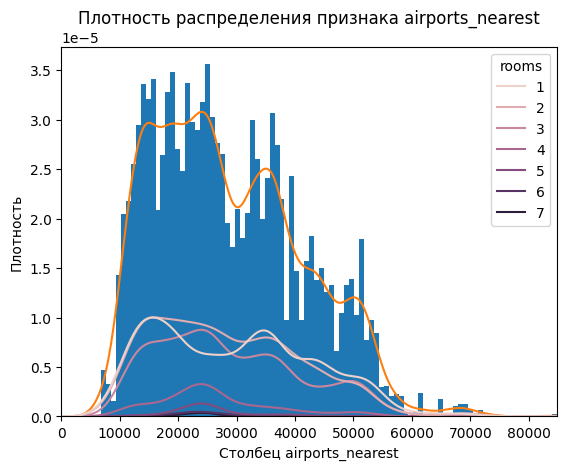

In [ ]:
# посмотрим на airports_nearest
stat_hist_density_kdeHueRooms(df, 'airports_nearest') # в небольшом количестве комнат до определенной степени пики следуют по форме за формой линии плотностираспределения

<Axes: ylabel='airports_nearest'>

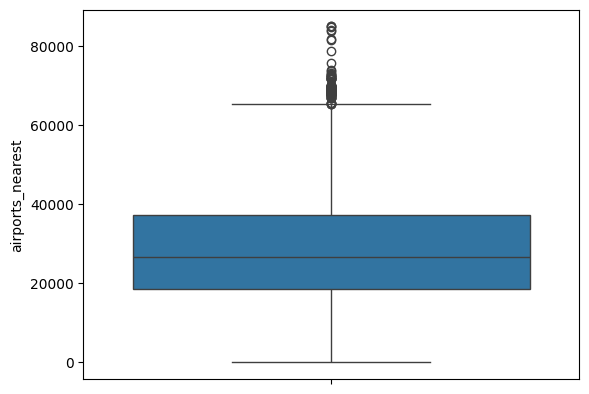

In [ ]:
sns.boxplot(df['airports_nearest']) # посмотрим выбросы

In [ ]:
df[df['airports_nearest'] > 65000] # да, выбросов довольно много и удалять их не очень хочется, потому что на вид там примерно обычные квартиры

last_price  total_area  rooms  floors_total  living_area  floor  \
72        4500000        55.0      2           3.0         35.5      2   
120       2500000        30.9      1           5.0         16.7      1   
302       3500000        31.0      1           5.0         17.5      1   
376       8400000        84.0      2           3.0         41.0      1   
577       4000000        59.0      3           5.0         37.0      1   
...           ...         ...    ...           ...          ...    ...   
22191     4800000        63.8      3          12.0         38.9      9   
22382     4400000        80.0      2           4.0         48.0      4   
22855     2950000        31.0      1           1.0         16.4      1   
23025     3465000        46.9      2           4.0         29.7      4   
23114     7300000       102.0      3          13.0         55.0      3   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
72              7.5           68258.0              49984.0               3.0   
120             6.0           68997.0              50722.0               1.0   
302             5.4           72005.0              53104.0               3.0   
376            13.0           73827.0              54926.0               0.0   
577             7.0           84665.0              65764.0               0.0   
...             ...               ...                  ...               ...   
22191           7.5           65328.0              47054.0               1.0   
22382          13.0           69449.0              51175.0               2.0   
22855           5.6           73115.0              54214.0               3.0   
23025           7.8           69619.0              51345.0               3.0   
23114          16.0           65254.0              46979.0               1.0   

       ponds_around3000  Floors_total_marker  First_floor_marker  \
72                  3.0                    0                   0   
120                 2.0                    1                   1   
302                 1.0                    1                   1   
376                 0.0                    0                   1   
577                 0.0                    1                   1   
...                 ...                  ...                 ...   
22191               1.0                    0                   0   
22382               3.0                    0                   0   
22855               1.0                    0                   1   
23025               3.0                    0                   0   
23114               1.0                    0                   0   

       Last_floor_marker  
72                     0  
120                    0  
302                    0  
376                    0  
577                    0  
...                  ...  
22191                  0  
22382                  1  
22855                  1  
23025                  1  
23114                  0  

[110 rows x 14 columns]

<Axes: xlabel='airports_nearest', ylabel='last_price'>

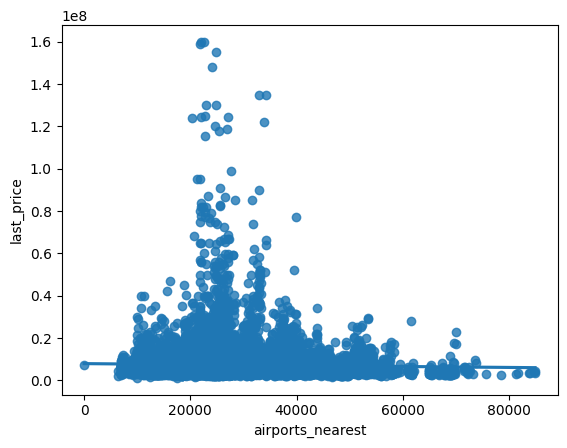

In [ ]:
sns.regplot(df, x = "airports_nearest", y = 'last_price') # тоже распределено вдоль линии цены, но с выбросами. особенно много выбросов в промежутке 20000 - 40000

<Axes: xlabel='airports_nearest', ylabel='last_price'>

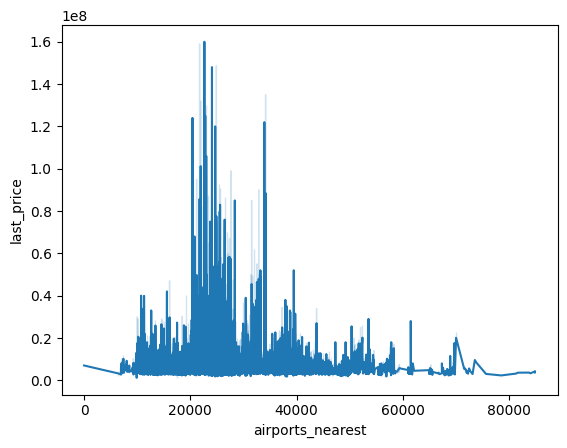

In [ ]:
sns.lineplot(df, x = "airports_nearest", y = 'last_price')

<ipython-input-140-f51ffb0ca391>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x = 'airports_nearest', hue = 'floor') # а может этаж влияет. Что-то похожее есть с малой этажностью в районе отметки 25000, но слабее, чем с количеством комнат


<Axes: xlabel='airports_nearest', ylabel='Density'>

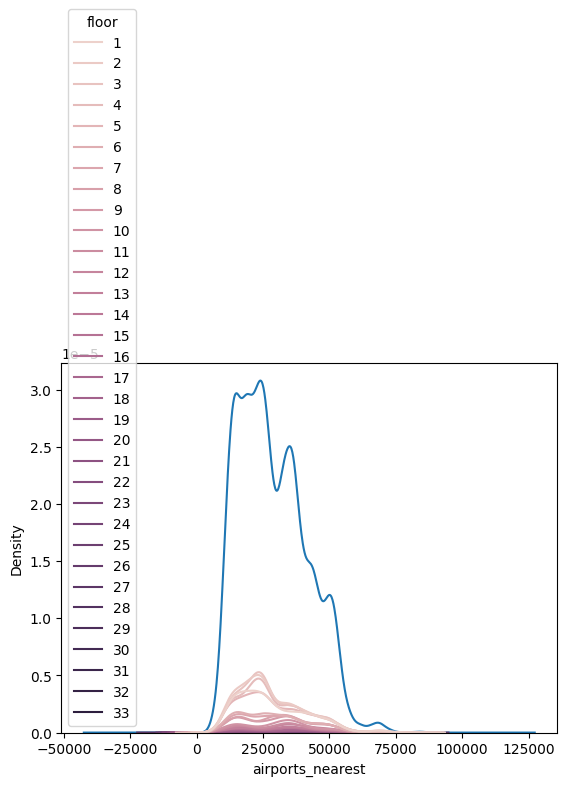

In [ ]:
df['airports_nearest'].plot.density()
sns.kdeplot(df, x = 'airports_nearest', hue = 'floor') # а может этаж влияет. Что-то похожее есть с малой этажностью в районе отметки 25000, но слабее, чем с количеством комнат

<ipython-input-141-7f12e0a1274b>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x = 'airports_nearest', hue = 'floors_total') # c этажностью зданий более интересно. И есть какой-то скачок в районе 20000


<Axes: xlabel='airports_nearest', ylabel='Density'>

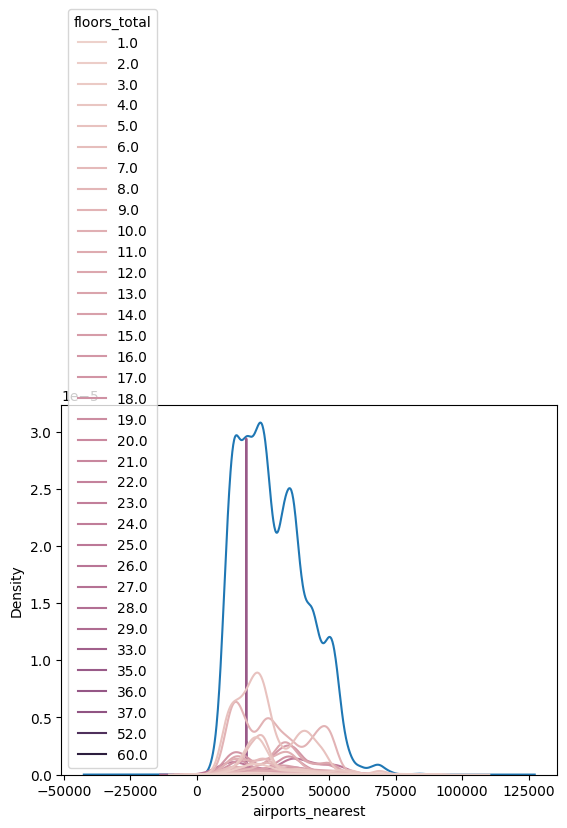

In [ ]:
df['airports_nearest'].plot.density()
sns.kdeplot(df, x = 'airports_nearest', hue = 'floors_total') # c этажностью зданий более интересно. И есть какой-то скачок в районе 20000

<Axes: xlabel='airports_nearest', ylabel='Density'>

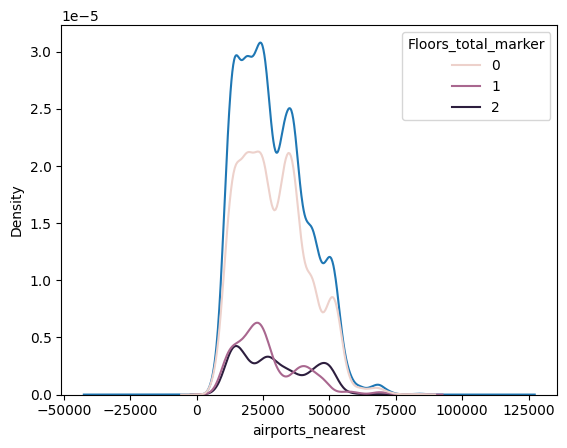

In [ ]:
df['airports_nearest'].plot.density()
sns.kdeplot(df, x = 'airports_nearest', hue = 'Floors_total_marker')
# когда мы выделили 5ти и 9тиэтажки в отдельнын признаки, видно, что плотность распределения остальной массы домов близка по форме к распределению признака близости аэропорта

<Axes: xlabel='airports_nearest', ylabel='Density'>

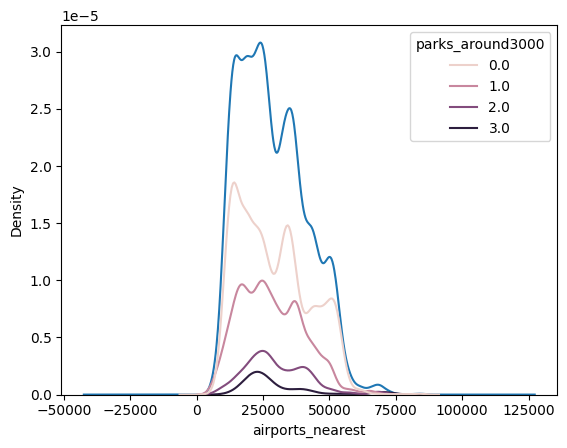

In [ ]:
df['airports_nearest'].plot.density()
sns.kdeplot(df, x = 'airports_nearest', hue = 'parks_around3000') # c отсутствием парков тоже интересная корреляция

<Axes: xlabel='airports_nearest', ylabel='Density'>

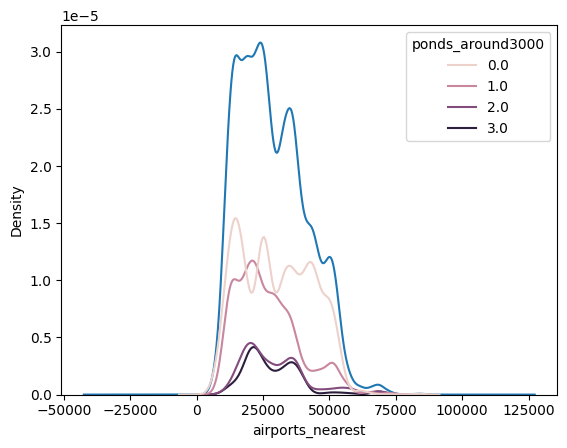

In [ ]:
df['airports_nearest'].plot.density()
sns.kdeplot(df, x = 'airports_nearest', hue = 'ponds_around3000') # c отсутствием прудов - тоже не очень

In [ ]:
# много факторов, видимо, связаны с расстоянием до аэропотра, но не все очевидным образом

count    16285.000000
mean     14257.193982
std       8660.379819
min        181.000000
25%       9380.000000
50%      13123.000000
75%      16268.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


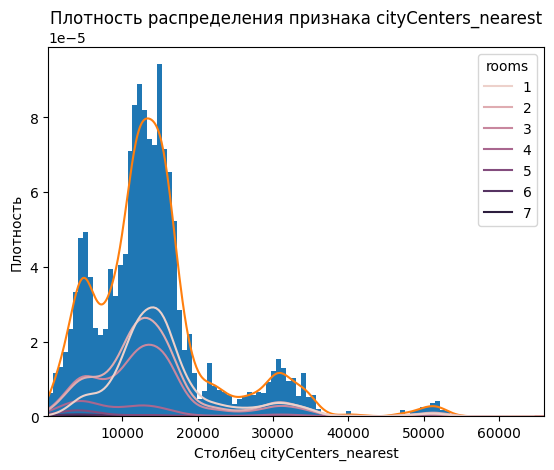

In [ ]:
stat_hist_density_kdeHueRooms(df, 'cityCenters_nearest')

<Axes: >

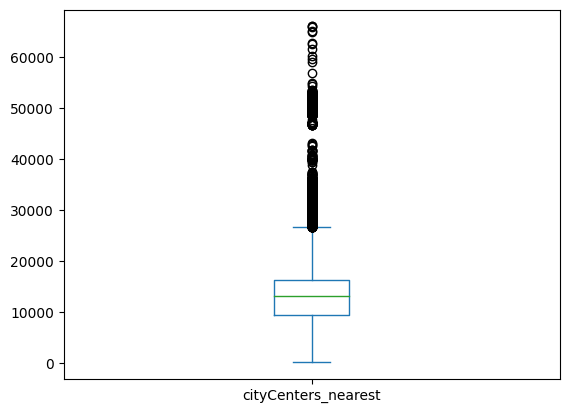

In [ ]:
df['cityCenters_nearest'].plot.box()  # и снова очень много выбросов

<Axes: xlabel='cityCenters_nearest', ylabel='Density'>

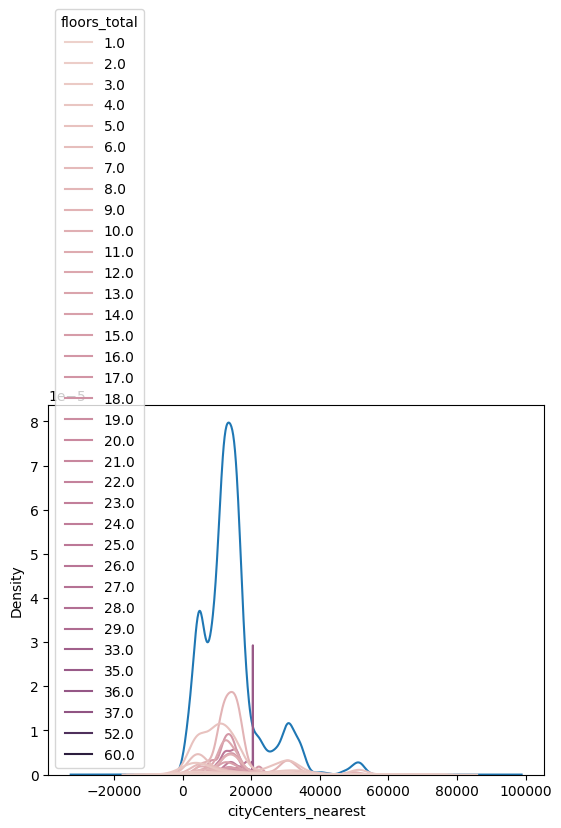

In [ ]:
df['cityCenters_nearest'].plot.density()
sns.kdeplot(df, x = 'cityCenters_nearest', hue = 'floors_total', warn_singular=False)

In [ ]:
# что же там за скачок постоянно с этажностью, чтото мы цпустили
df['floors_total'].value_counts(normalize = True) # а, у нас много 5 и 9тиэтаек. Видимо это постсоветское пространство с типовыми домами

floors_total
5.0     0.209059
9.0     0.182904
16.0    0.067512
12.0    0.066466
10.0    0.051695
4.0     0.048557
25.0    0.048434
6.0     0.045295
17.0    0.037541
7.0     0.028740
14.0    0.025848
24.0    0.021417
3.0     0.020555
8.0     0.017663
18.0    0.017478
23.0    0.015693
15.0    0.015016
19.0    0.013909
13.0    0.011078
20.0    0.010893
22.0    0.010708
11.0    0.008677
26.0    0.006400
21.0    0.005662
27.0    0.005046
2.0     0.004616
35.0    0.001354
28.0    0.000985
1.0     0.000308
36.0    0.000185
60.0    0.000062
29.0    0.000062
33.0    0.000062
52.0    0.000062
37.0    0.000062
Name: proportion, dtype: float64

<Axes: xlabel='cityCenters_nearest', ylabel='Density'>

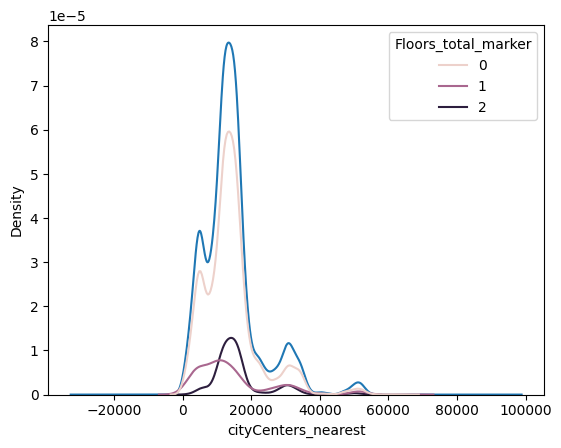

In [ ]:
#Посмотрим на признак удаленности от центра города
df['cityCenters_nearest'].plot.density()
sns.kdeplot(df, x = 'cityCenters_nearest', hue = 'Floors_total_marker')
# когда мы выделили 5ти и 9тиэтажки в отдельнын признаки, видно, что плотность распределения остальной массы домов близка по форме к распределению признака близости центра города

<Axes: xlabel='cityCenters_nearest', ylabel='Density'>

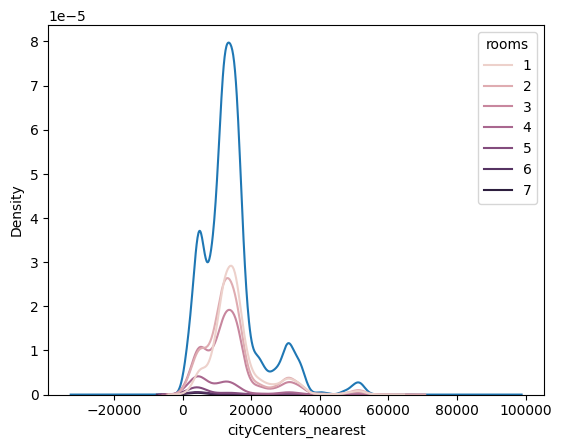

In [ ]:
df['cityCenters_nearest'].plot.density()
sns.kdeplot(df, x = 'cityCenters_nearest', hue = 'rooms')

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

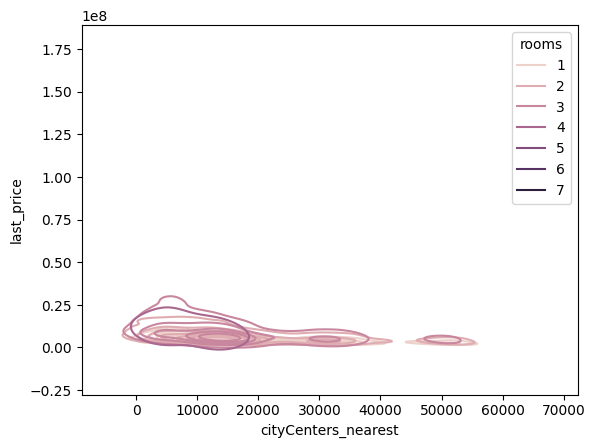

In [ ]:
#df['cityCenters_nearest'].plot.density()
sns.kdeplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'rooms')

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

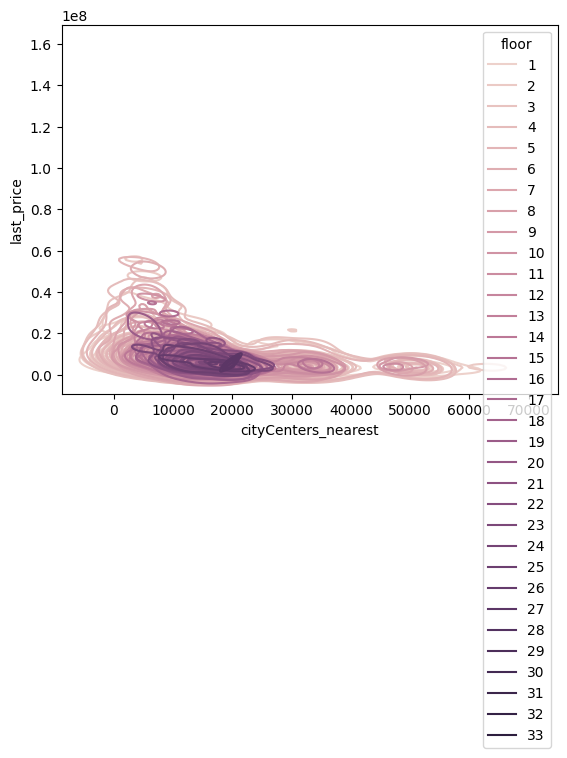

In [ ]:
sns.kdeplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'floor', warn_singular=False)

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

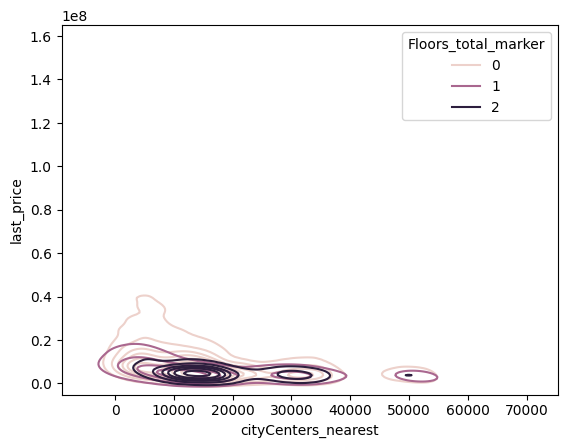

In [ ]:
#df['cityCenters_nearest'].plot.density()
sns.kdeplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'Floors_total_marker')
# на графике видно, что плотность распределения не 5 и не 9тиэтажныхдомов влияет на цену вблизи от центра города.
# при этом основные массы всех типов домов, включая уже 5 и 9 тиэтажные, -  расположены в 3х условных точках притяжения - это где-то вокруг 15000, вокруг 30000 и вокруг 50000

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

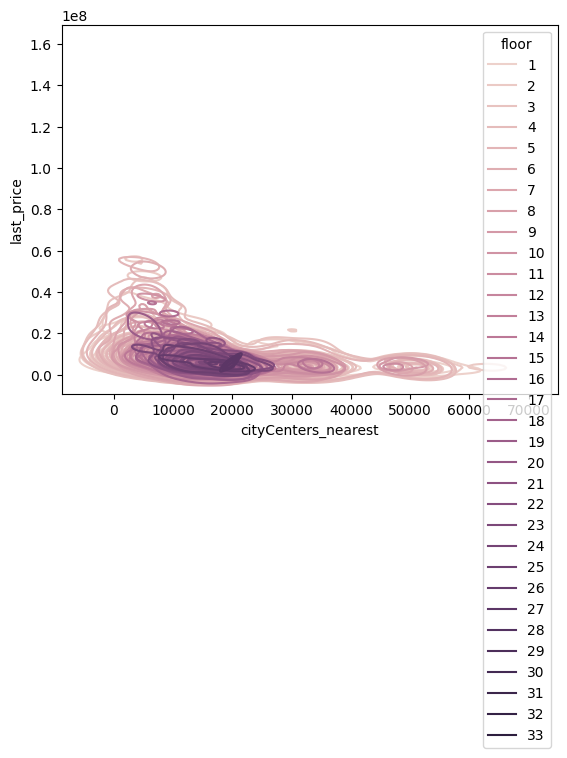

In [ ]:
sns.kdeplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'floor', warn_singular=False)
# Здесь более видно, что показатель этажа, на котором квартира, растет, достигая своего пика в 20000 от центра города, а дальше  -снижается с 2умя небольшими точками притяжения вокруг 30000 и вокруг 50000

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

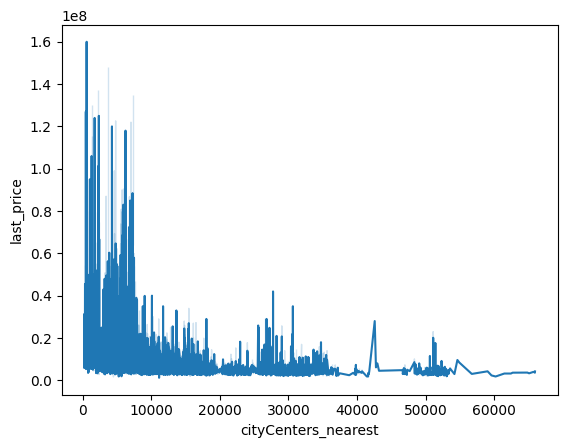

In [ ]:
sns.lineplot(df, x = 'cityCenters_nearest', y = 'last_price')


<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

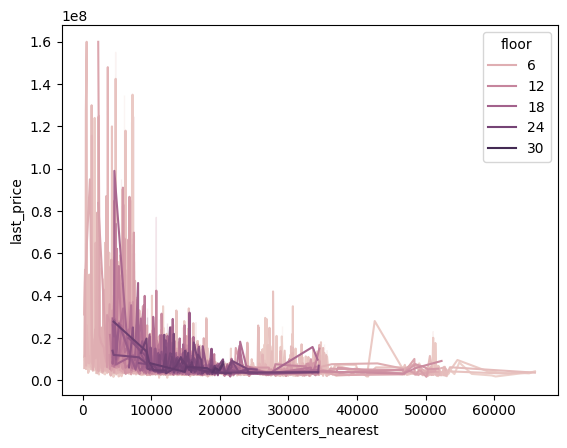

In [ ]:
sns.lineplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'floor') # близко к центру - дорого и квартиры на не слишком высоких этажах  (т.к.здания в целом - не высотки)

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

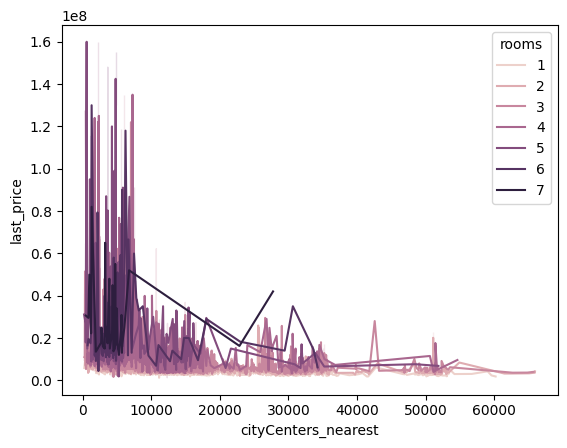

In [ ]:
sns.lineplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'rooms') # занятно что много многокомнатных квартир максимально сконцентрированы ближе к центру города

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

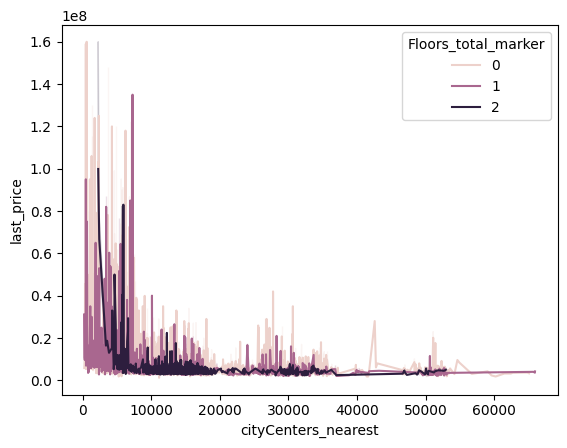

In [ ]:
sns.lineplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'Floors_total_marker')


count    16285.000000
mean         0.609334
std          0.799571
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


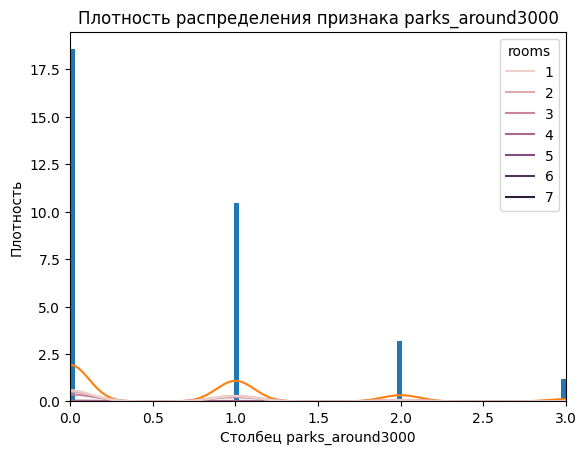

In [ ]:
# Посмотрим на парки рядом 3000
stat_hist_density_kdeHueRooms(df, 'parks_around3000') # признак дискретный. показывает количество парков рядом с квартиро й

<Axes: ylabel='parks_around3000'>

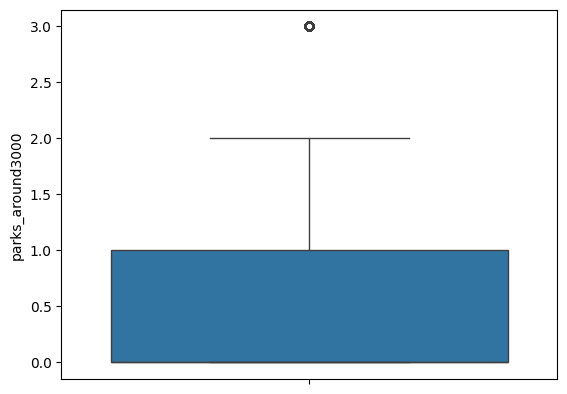

In [ ]:
sns.boxplot(df['parks_around3000']) # большинство значений - нет парков или 1 (см. ниже - 55,6 % и 31,3%)

In [ ]:
df['parks_around3000'].value_counts(normalize = True)

parks_around3000
0.0    0.556217
1.0    0.313294
2.0    0.095425
3.0    0.035063
Name: proportion, dtype: float64

<Axes: xlabel='parks_around3000', ylabel='cityCenters_nearest'>

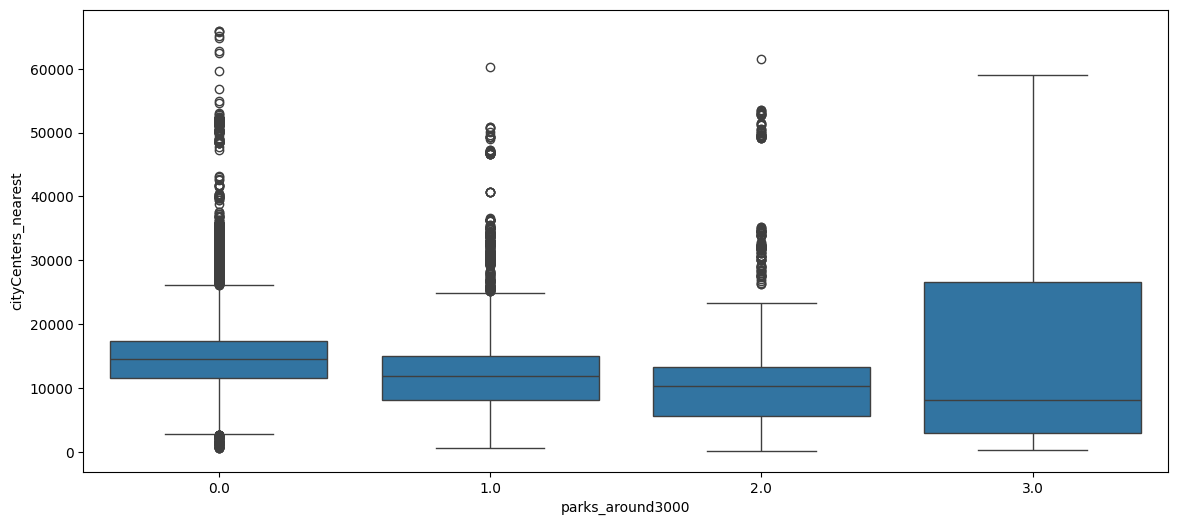

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df, x = 'parks_around3000', y = 'cityCenters_nearest') # в центре больше парков

<Axes: xlabel='parks_around3000', ylabel='last_price'>

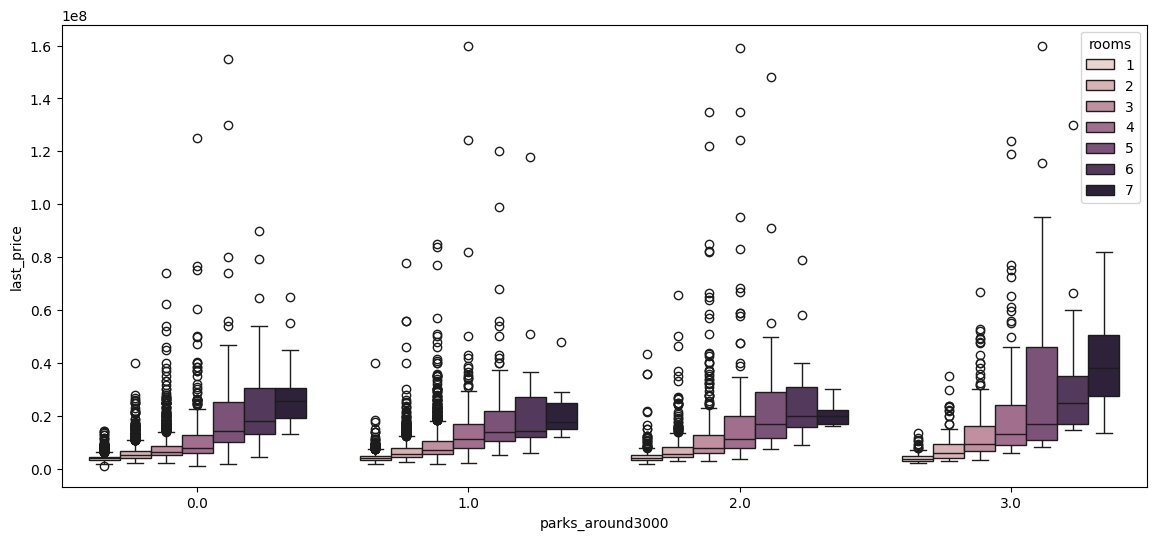

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df, x = 'parks_around3000', y = 'last_price', hue = 'rooms')

<Axes: xlabel='parks_around3000', ylabel='last_price'>

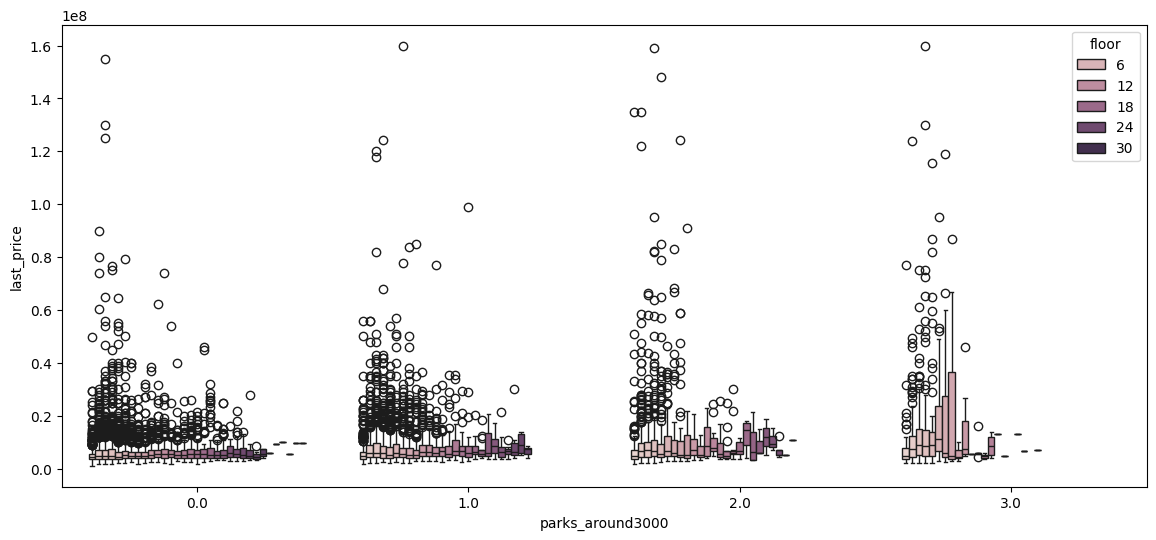

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df, x = 'parks_around3000', y = 'last_price', hue = 'floor') # не самый информативный график, но видно, что где 3 парка сразу подскакивает верхний квартиль и вытягивается ящик

<Axes: xlabel='parks_around3000', ylabel='last_price'>

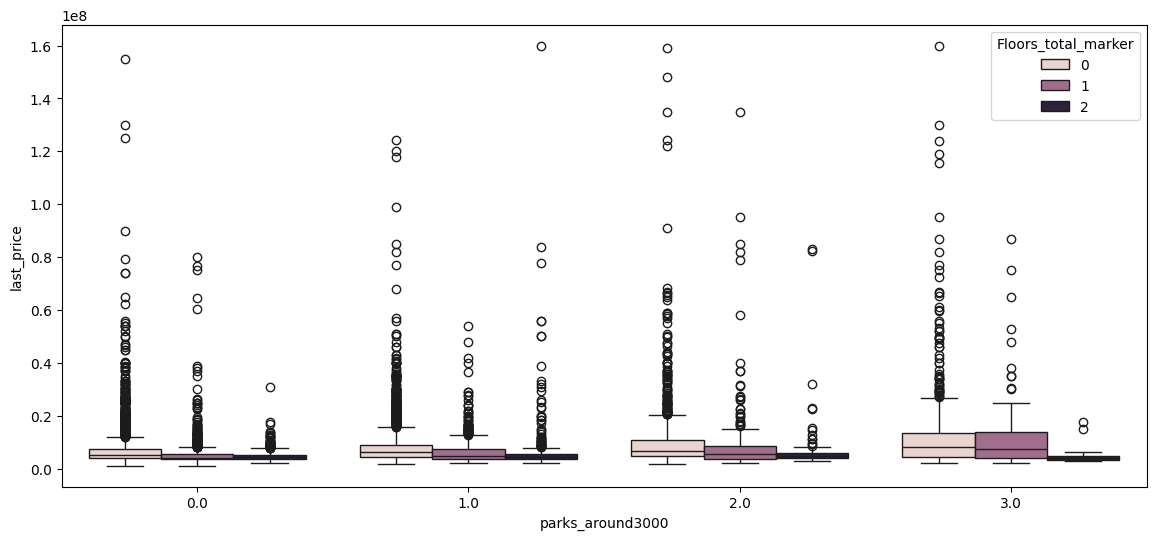

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df, x = 'parks_around3000', y = 'last_price', hue = 'Floors_total_marker') # а здесь видно что на 9тиэтажки оказывает наименьшее влияние по сравнению с 5тиэтажкамии и домами с прочей этажностью

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

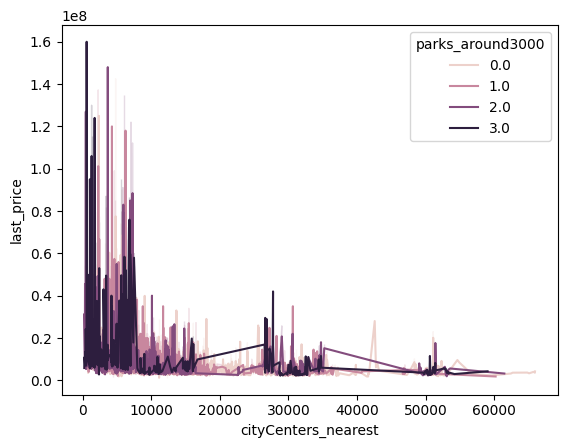

In [ ]:
sns.lineplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'parks_around3000') # ближе к центру парков больше - это оказывает влияние.
#дальше от центра, как раз в этих кластерах у 30000 и 5000 тоже много парков

<Axes: xlabel='rooms', ylabel='last_price'>

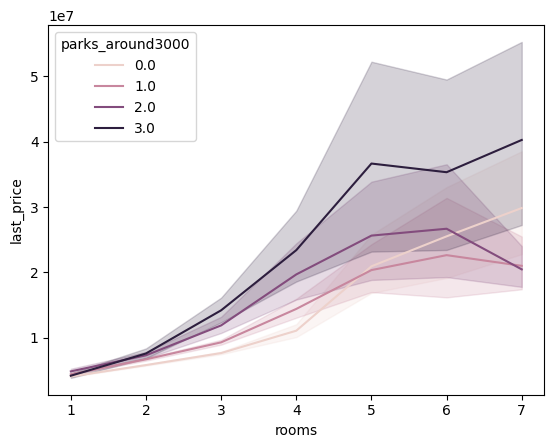

In [ ]:
sns.lineplot(df, x = 'rooms', y = 'last_price', hue = 'parks_around3000')
# для квартир до 5 комнат, чем больше парков вокруг, тем больше цена. А для квартир 6- 7 комнат с разным количеством парков идут разнонаправленные тренды и значительно увеличиваются доверитьельные интервалы


<Axes: xlabel='floor', ylabel='last_price'>

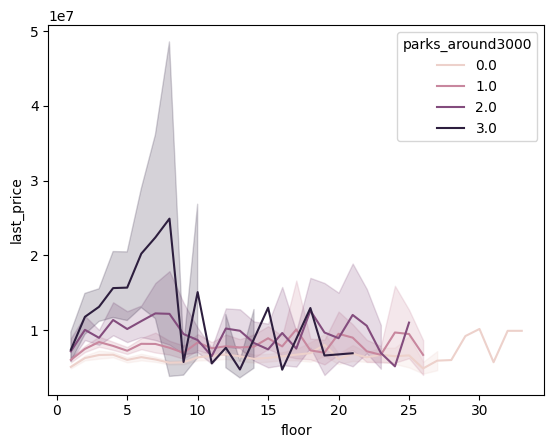

In [ ]:
sns.lineplot(df, x = 'floor', y = 'last_price', hue = 'parks_around3000') # для квартир, расположенных с 1 по 8 этажи, большее влияние на цену оказывает когда рядом 3 парка.
# Для остальных случаев в наших данны слишком извилистые линии, непозводяющие делать однозначных суждений

<Axes: xlabel='floors_total', ylabel='last_price'>

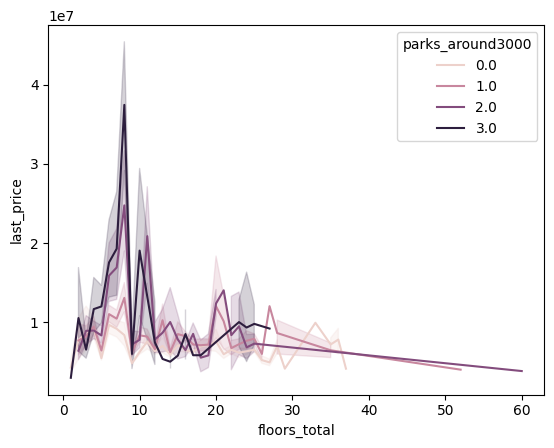

In [ ]:
sns.lineplot(df, x = 'floors_total', y = 'last_price', hue = 'parks_around3000') # для квартир, расположенных в домах с этажностью до 8 этажей, и домов 10-11 этажей,
# очень значительное влияние на цену оказывает когда рядом 2-3 парка.
# Для остальных случаев в наших данных слишком извилистые линии, не позволяющие делать однозначных суждений

count    16285.000000
mean         0.762297
std          0.936738
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


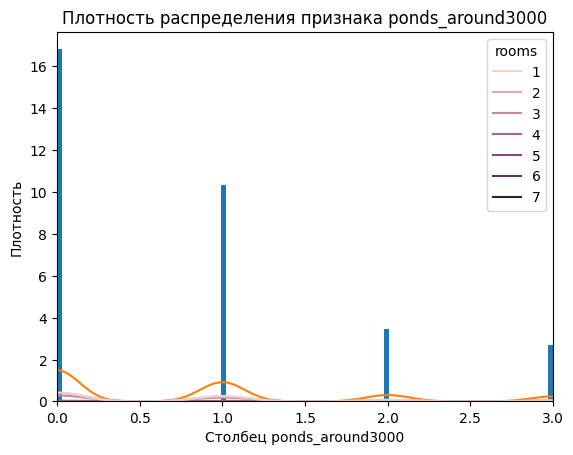

In [ ]:
# Посмотрим на водоемы рядом 3000
stat_hist_density_kdeHueRooms(df, 'ponds_around3000') # признак дискретный. показывает количество водоемов рядом с квартиро й

<Axes: ylabel='ponds_around3000'>

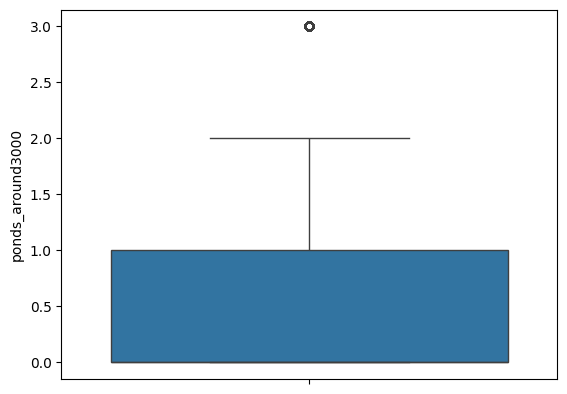

In [ ]:
sns.boxplot(df['ponds_around3000']) # большинство значений - нет водоемов или 1 (см. ниже - 50 % и 31%)

In [ ]:
df['ponds_around3000'].value_counts()

ponds_around3000
0.0    8212
1.0    5060
2.0    1685
3.0    1328
Name: count, dtype: int64

In [ ]:
df['ponds_around3000'].value_counts(normalize = True)

ponds_around3000
0.0    0.504268
1.0    0.310715
2.0    0.103469
3.0    0.081547
Name: proportion, dtype: float64

<Axes: xlabel='ponds_around3000', ylabel='cityCenters_nearest'>

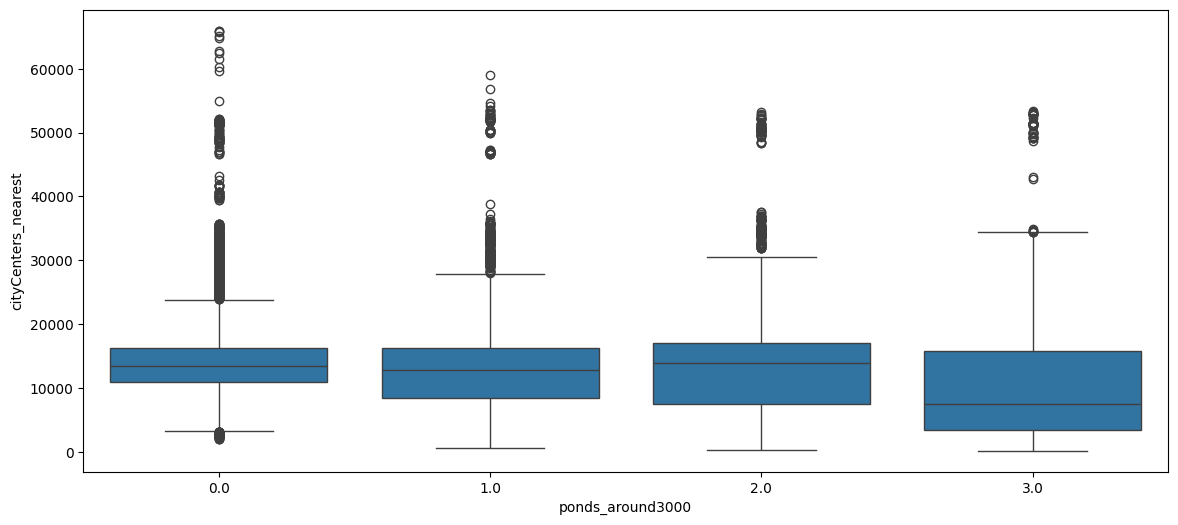

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df, x = 'ponds_around3000', y = 'cityCenters_nearest') # в центре больше водоемов

<Axes: xlabel='ponds_around3000', ylabel='last_price'>

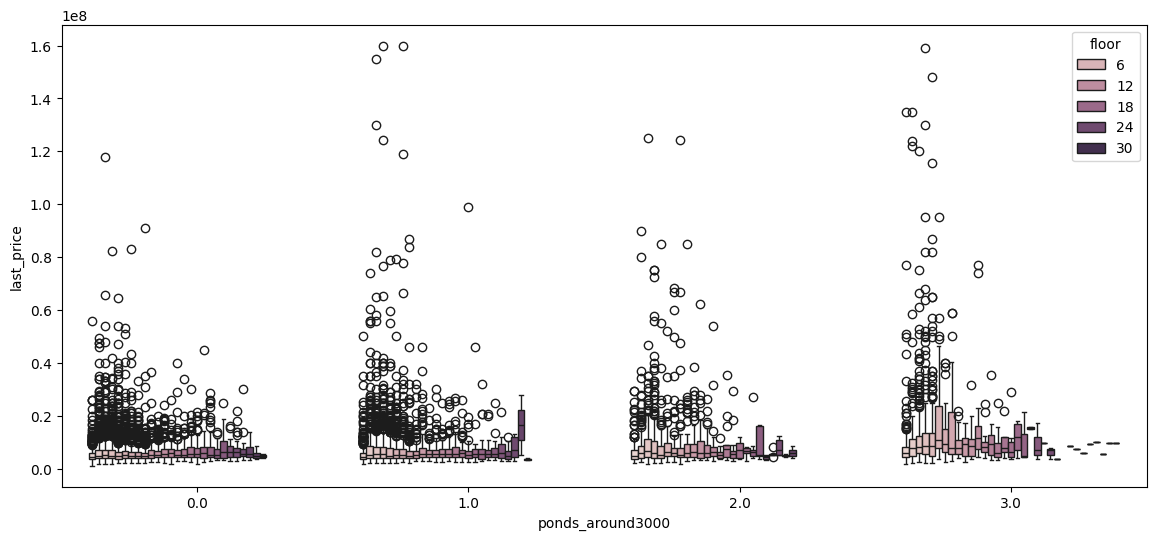

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(df, x = 'ponds_around3000', y = 'last_price', hue = 'floor') # настолько же яркого как бфыло с парками нет

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

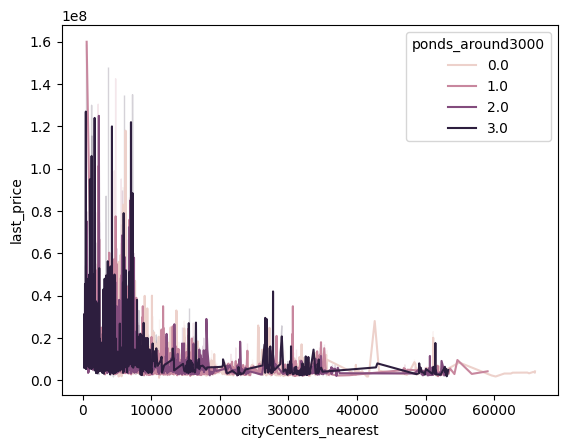

In [ ]:
sns.lineplot(df, x = 'cityCenters_nearest', y = 'last_price', hue = 'ponds_around3000') # ближе к центру водоемов много - это оказывает влияние.
#дальше от центра, как раз в этих кластерах у 30000 и 5000 тоже есть помногу водоемов

<Axes: xlabel='rooms', ylabel='last_price'>

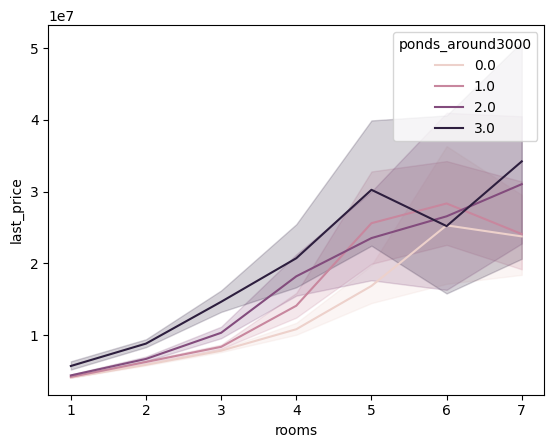

In [ ]:
sns.lineplot(df, x = 'rooms', y = 'last_price', hue = 'ponds_around3000')
# для квартир до 5 комнат, чем больше водоемов вокруг, тем больше цена. А для квартир 6- 7 комнат с разным количеством водоемов идут разнонаправленные тренды и значительно увеличиваются доверитьельные интервалы


<Axes: xlabel='floor', ylabel='last_price'>

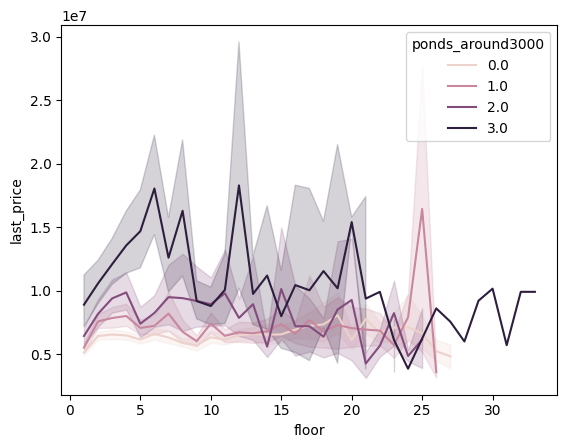

In [ ]:
sns.lineplot(df, x = 'floor', y = 'last_price', hue = 'ponds_around3000') # линия неровная, тем не менее, линия показывающая квартиры вблизи от трех водоемов практически по всей длине выше (по цене), чем остальные

<Axes: xlabel='floors_total', ylabel='last_price'>

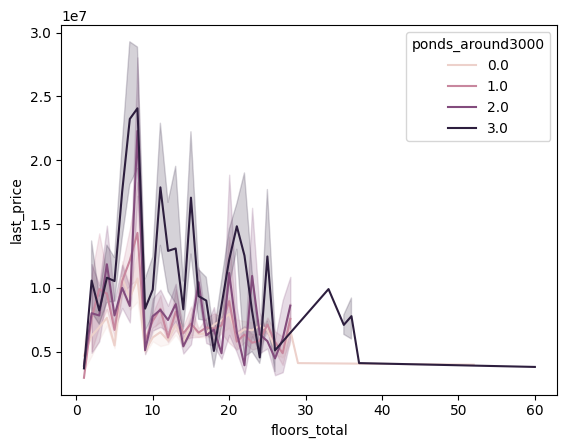

In [ ]:
sns.lineplot(df, x = 'floors_total', y = 'last_price', hue = 'ponds_around3000') # то же самое. Возможно, смотреть на

In [ ]:
# добавим в df столбец сл стоимостью квадратного метра и посмотрим каким образом ведут себя эти данные
df['price_per_sq_meter'] = df['last_price'] / df['total_area']
df

last_price  total_area  rooms  floors_total  living_area  floor  \
0        13000000      108.00      3          16.0         51.0      8   
1         3350000       40.40      1          11.0         18.6      1   
2         5196000       56.00      2           5.0         34.3      4   
4        10000000      100.00      2          14.0         32.0     13   
6         3700000       37.30      1          26.0         10.6      6   
...           ...         ...    ...           ...          ...    ...   
23689     3550000       35.30      1          15.0         16.3      4   
23690     5500000       52.00      2           5.0         31.0      2   
23691     9470000       72.90      2          25.0         40.3      7   
23693     4600000       62.40      3           9.0         40.0      8   
23694     9700000      133.81      3           5.0         73.3      3   

       kitchen_area  airports_nearest  cityCenters_nearest  parks_around3000  \
0             25.00           18863.0              16028.0               1.0   
1             11.00           12817.0              18603.0               0.0   
2              8.30           21741.0              13933.0               1.0   
4             41.00           31856.0               8098.0               2.0   
6             14.40           52996.0              19143.0               0.0   
...             ...               ...                  ...               ...   
23689          9.10           17284.0              16081.0               1.0   
23690          6.00           20151.0               6263.0               1.0   
23691         10.60           19424.0               4489.0               0.0   
23693          8.00           45602.0              34104.0               1.0   
23694         13.83           24665.0               4232.0               1.0   

       ponds_around3000  Floors_total_marker  First_floor_marker  \
0                   2.0                    0                   0   
1                   0.0                    0                   1   
2                   2.0                    1                   0   
4                   1.0                    0                   0   
6                   0.0                    0                   0   
...                 ...                  ...                 ...   
23689               2.0                    0                   0   
23690               0.0                    0                   0   
23691               1.0                    0                   0   
23693               1.0                    0                   0   
23694               3.0                    0                   0   

       Last_floor_marker  price_per_sq_meter  
0                      0       120370.370370  
1                      0        82920.792079  
2                      0        92785.714286  
4                      0       100000.000000  
6                      0        99195.710456  
...                  ...                 ...  
23689                  0       100566.572238  
23690                  0       105769.230769  
23691                  0       129903.978052  
23693                  0        73717.948718  
23694                  0        72490.845228  

[16285 rows x 15 columns]

count     16285.000000
mean     109288.621259
std       42432.278554
min       15345.268542
25%       87209.302326
50%      101250.000000
75%      120000.000000
max      995983.935743
Name: price_per_sq_meter, dtype: float64


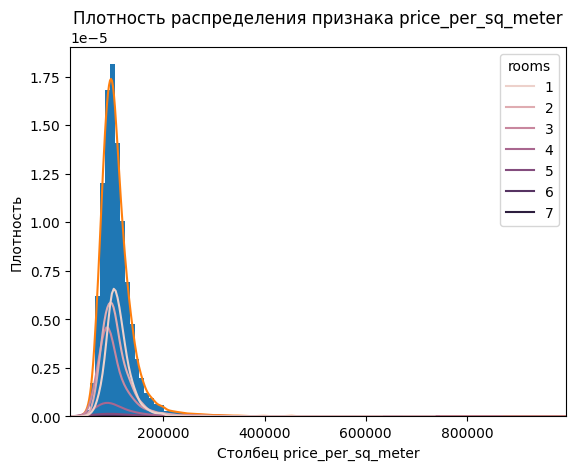

In [ ]:
#df['price_per_sq_meter'].plot.density()
stat_hist_density_kdeHueRooms(df, 'price_per_sq_meter')

<Axes: >

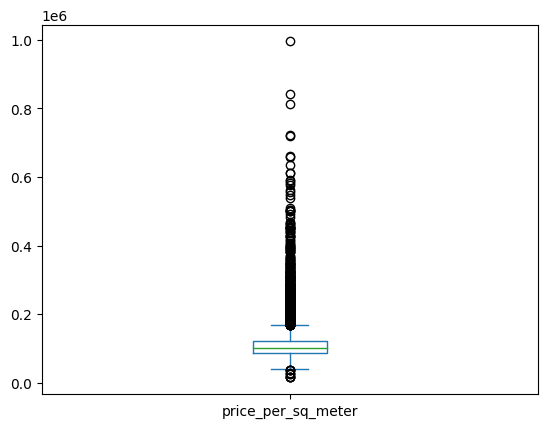

In [ ]:
df['price_per_sq_meter'].plot.box()

In [ ]:
min(df['last_price'])

1190000

In [ ]:
max(df['last_price'])

160000000

In [ ]:
df_corr = df[['last_price', 'total_area', 'rooms', 'price_per_sq_meter',
       'living_area', 'kitchen_area', 'floor', 'floors_total', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000']].corr()

In [ ]:
# экспортируем получившиеся данные чтобы можно было сделать дашборд
df[['last_price', 'total_area', 'rooms', 'price_per_sq_meter',
       'living_area', 'kitchen_area', 'floor', 'floors_total', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000']].to_csv('flats.csv', encoding='utf-8')


<Axes: >

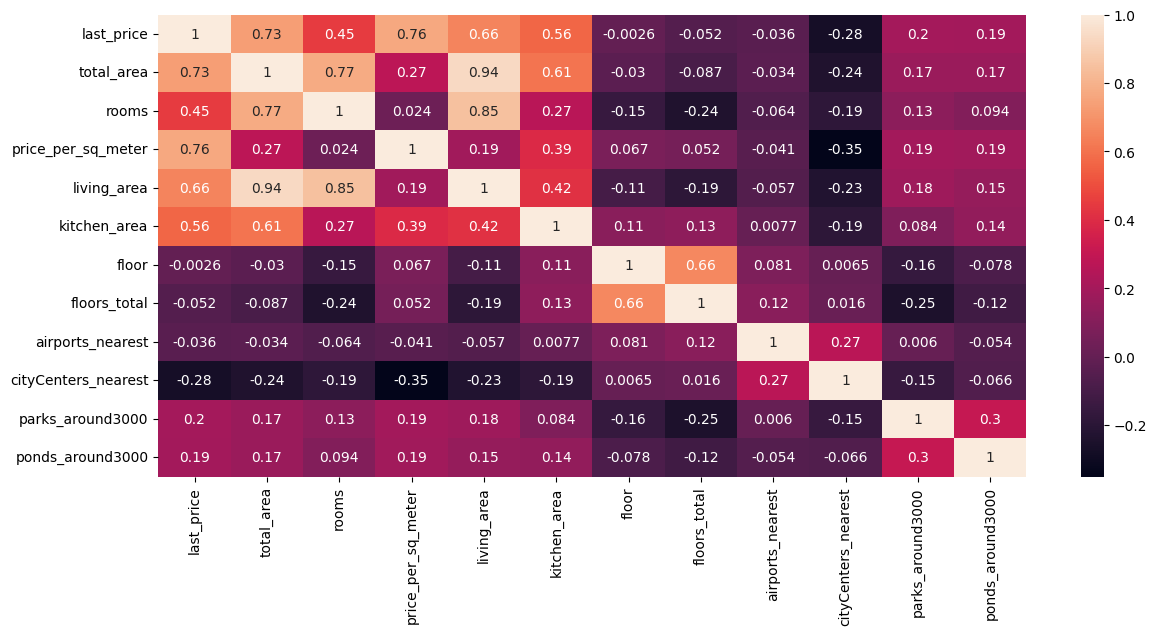

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(df_corr, annot = True, ax=ax)
# sns.heatmap()

Итак, значимые корреляции с ценой: price_per_sq_meter (+76) # что логично, поскольку это производный от площади и цнеы столбец, а общая площадь влияет максимальным обрзом на цену Total area (+ 73%) living_area(+ 66 %) kitchen_area(+ 56%) rooms(+ 45%) cityCenters_nearest (-28%)

parks_around3000' (+20%),  'ponds_around3000 +19%

Оставим столбцы: 'last_price',  'price_per_sq_meter', 'rooms', 'living_area', 'kitchen_area', 'cityCenters_nearest',  'parks_around3000', 'ponds_around3000'

Перейдем к модели
d Разделим df  на обучающую и тестовую части

In [ ]:
df_corr_floors = df[['last_price', 'rooms', 'price_per_sq_meter', 'cityCenters_nearest', 'First_floor_marker', 'Last_floor_marker']].corr()

<Axes: >

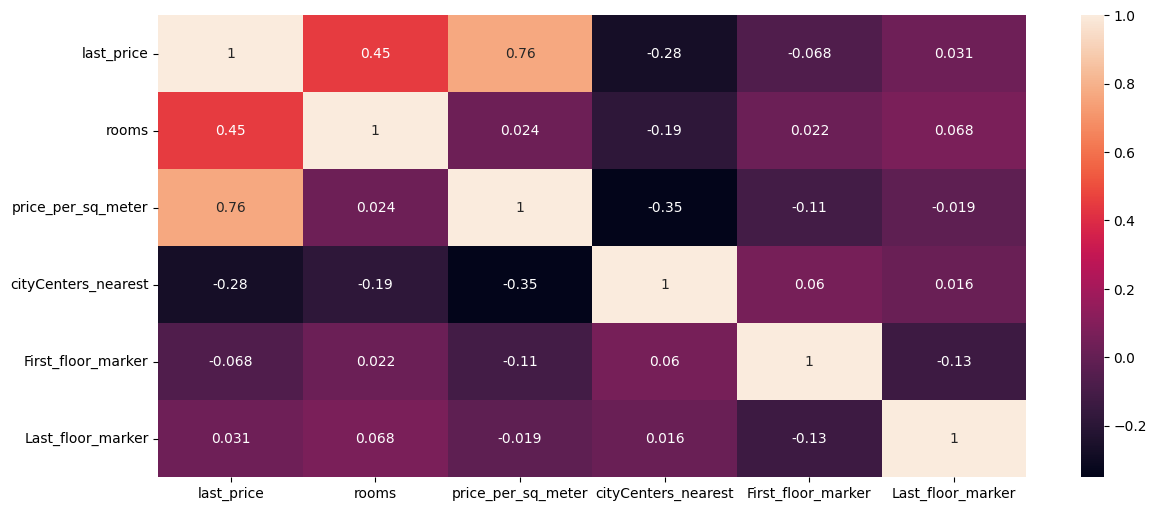

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(df_corr_floors, annot = True, ax=ax)
# sns.heatmap()

In [ ]:
df['rooms'] = df['rooms'].astype('float64')

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1) # 10 процентов df будет использоваться для проверки, а 90 - для обучения

In [ ]:
predictors = ['price_per_sq_meter', 'rooms', 'total_area', 'kitchen_area', 'cityCenters_nearest',  'parks_around3000', 'ponds_around3000']
x = pd.get_dummies(train_df[predictors], drop_first=True)

In [ ]:
x

price_per_sq_meter  rooms  total_area  kitchen_area  \
18526       125581.395349    4.0        86.0         12.00   
11221       107205.882353    3.0        68.0          7.60   
8162        261785.714286    2.0        84.0         18.00   
6175         93198.992443    1.0        39.7         11.85   
10888       143737.166324    3.0        97.4         20.80   
...                   ...    ...         ...           ...   
21949        98418.277680    2.0        56.9         10.50   
7232        158620.689655    2.0        58.0         10.70   
19173        95238.095238    2.0        42.0          5.60   
11706        94091.903720    2.0        45.7          6.70   
13619       105799.373041    4.0       127.6         33.60   

       cityCenters_nearest  parks_around3000  ponds_around3000  
18526               8943.0               0.0               0.0  
11221               5218.0               1.0               2.0  
8162               13265.0               0.0               0.0  
6175               19603.0               0.0               0.0  
10888               1906.0               3.0               3.0  
...                    ...               ...               ...  
21949              15067.0               0.0               0.0  
7232                5223.0               0.0               1.0  
19173              13277.0               0.0               1.0  
11706              11920.0               1.0               1.0  
13619              12870.0               1.0               1.0  

[14656 rows x 7 columns]

In [ ]:
model = linear_model.LinearRegression()
model.fit(x, train_df['last_price'])

LinearRegression()

In [ ]:
print(f'Коэффициент B0: {model.intercept_}')

Коэффициент B0: -14872572.731370892


In [ ]:
print(f'Коэффициент B0: {model.intercept_}')
for name, coef in zip(x.columns, model.coef_):
    print(f"{name} : {coef}")

Коэффициент B0: -14872572.731370892
price_per_sq_meter : 119.14229882348727
rooms : -119930.59925711829
total_area : 141244.43763852978
kitchen_area : -40915.70506826605
cityCenters_nearest : 77.76368183767772
parks_around3000 : -55508.70051901639
ponds_around3000 : -151258.2388015139


In [ ]:
# как проверить. Метод наименьших квадратов. То, насколько модель ошиблась. В хорошей можели если распределить остатки, то они распределятся нормальным образом.
fitted = model.predict(x)
residius = train_df['last_price'] - fitted # из реалных цен вычтем цены, которые модель спрогнозировала
residius

18526   -1.161235e+06
11221    4.082011e+05
8162    -6.246903e+06
6175     9.416066e+05
10888   -3.268902e+05
             ...     
21949    2.077951e+05
7232    -2.595280e+06
19173    1.181200e+06
11706    1.301196e+06
13619   -1.194960e+06
Name: last_price, Length: 14656, dtype: float64

<Axes: xlabel='last_price', ylabel='Count'>

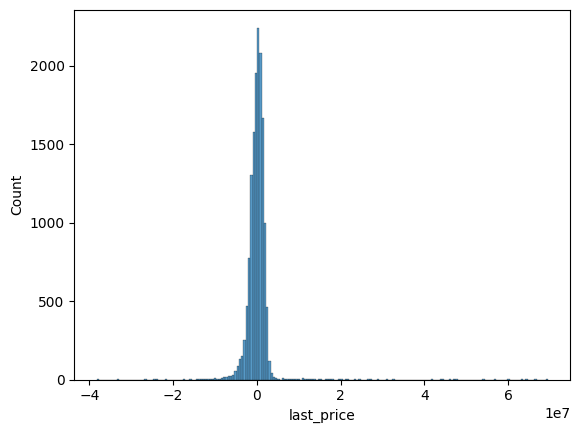

In [ ]:
sns.histplot(x = residius, bins = 200) # остатки напоминают нормальное распредеение и стремятся к 0. Но иногда модель на крупные числа туда-сюда ошибается. Но это она делает редко

In [ ]:
st.normaltest(residius) # но вероятность получить такую же или более аномальную выборку из нормального распределения = практически равна 0.

NormaltestResult(statistic=21585.180094379735, pvalue=0.0)

In [ ]:
r2 = metrics.r2_score(train_df['last_price'], fitted)
r2
# наша модель получилась может охарактеризовать 89 % изменения цены. Если у нас есть все исходные данные, мы можем спрогнозировать 89 % цены.

0.8852422238561478

In [ ]:
#r2 = metrics.r2_score(test_df['last_price'], fitted)
#r2 # Не раьотает с тестовой из за разницы в числе значений

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(train_df['last_price'], fitted))# корень из среднеквадратичной ошибки
print(r2, rmse)
# c r2 понятно - чем ближе к 1б тем лучше. С рмсе сложнее - это значение хвоста для регрессии. Чем оно ниже, тем лучше, конечо.
#Но понять нормаоное и оно можно только зная диапазон признака (last price в нашем случае)
# диапазон last_price у нас был от  1160000 до 160000000. Для низких цен рмсе в таком размере - это, конечно, не очень хорошо.

0.8852422238561478 2686348.294294551


In [ ]:
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
# y_pred = model.predict(test_df)

In [ ]:
# Забыли прологарифмировать. ПОка я не разобралась, как это сделать в первом варианте. Также не разобралась как протестировать  оценить результаты имено на тестовой выборке.
# ПОйдем другим путем. Поместим наши признаки в переменную X, а цены на жилье в переменную y.

X = df[['price_per_sq_meter', 'rooms', 'total_area', 'kitchen_area', 'cityCenters_nearest',  'parks_around3000', 'ponds_around3000']]
#y = df['last_price'].apply(np.log) # Правильно ли здесь прологарифмированно?
y = df['last_price']

In [ ]:
# импортируем необходимый модуль, не помню был ли он наверху
from sklearn.model_selection import train_test_split

# размер тестовой выборки составит 10%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 21733 to 9515
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price_per_sq_meter   1629 non-null   float64
 1   rooms                1629 non-null   float64
 2   total_area           1629 non-null   float64
 3   kitchen_area         1629 non-null   float64
 4   cityCenters_nearest  1629 non-null   float64
 5   parks_around3000     1629 non-null   float64
 6   ponds_around3000     1629 non-null   float64
dtypes: float64(7)
memory usage: 101.8 KB


In [ ]:
# размерность обучающей
print(X_train.shape, y_train.shape)

# и тестовой выборки
print(X_test.shape, y_test.shape)

(14656, 7) (14656,)
(1629, 7) (1629,)


In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model_1 = LinearRegression()

# обучим нашу модель
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model_1.predict(X_test)
# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])

[3363924.06151428 5712963.08369121 3381407.7263613  4170420.38729582
 3153384.13974391]


In [ ]:
# импортируем модуль метрик
from sklearn import metrics

# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error (RMSE): 3395540.575168845


In [ ]:
# коэффициент детерминации r2 (r квадрат) -  показывает, какая доля изменчивости целевой переменной объясняется с помощью нашей модели.
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 3))
# В данном случае мы видим, что 90 % изменчивости цены объясняется независимыми переменными, которые мы выбрали для нашей модели.
#

R2: 0.86


Осталось сделать функцию для ввода значений с клавиатуры.


In [ ]:
    print('Введите значение цены за квадратный метр')
    a = float(input())
    print('Введите число комнат')
    b = float(input())
    print('Введите значение общей площади')
    c = float(input())
    print('Введите значение площади кухни')
    d = float(input())
    print('Введите значение близоcти к центру города')
    e = float(input())
    print('Введите количество парков в радиусе 3 км')
    f = float(input())
    print('Введите число водоемов в радиусе 3 км')
    g = float(input())
    new_test_df = pd.DataFrame(data=[[a, b, c, d, e, f, g]], columns=['price_per_sq_meter', 'rooms', 'total_area', 'kitchen_area', 'cityCenters_nearest',  'parks_around3000', 'ponds_around3000'])
    y_pred = model_1.predict(new_test_df)

Введите значение цены за квадратный метр


KeyboardInterrupt: Interrupted by user

In [ ]:
y_pred

In [ ]:
def flat_price_Vanga (a, b, c, d, e, f, g):
    print('Введите значение цены за квадратный метр')
    a = float(input())
    print('Введите число комнат')
    b = float(input())
    print('Введите значение общей площади')
    c = float(input())
    print('Введите значение площади кухни')
    d = float(input())
    print('Введите значение близоcти к центру города')
    e = float(input())
    print('Введите количество парков в радиусе 3 км')
    f = float(input())
    print('Введите число водоемов в радиусе 3 км')
    g = float(input())


#new_test_df = pd.DataFrame([[a, b]], columns=['price_per_sq_meter', 'rooms'])

    new_test_df = pd.DataFrame(data=[[a, b, c, d, e, f, g]], columns=['price_per_sq_meter', 'rooms', 'total_area', 'kitchen_area', 'cityCenters_nearest',  'parks_around3000', 'ponds_around3000'])
    #new_test_df
    y_pred = model_1.predict(new_test_df)
    return y_pred
    #y_pred

In [ ]:
flat_price_Vanga

In [ ]:
df.columns